In [2]:
import requests
import pandas as pd
import time

In [ ]:
def fetch_season_results(season):
    url = f'http://ergast.com/api/f1/{season}/results.json?limit=1000'
    response = requests.get(url)
    data = response.json()
    race_results = data['MRData']['RaceTable']['Races']
    return race_results

def save_to_csv(data, filename):
    df = pd.json_normalize(data, 'Results', ['raceName', 'date', 'season'],
                           record_prefix='result_', errors='ignore')
    df.to_csv(filename, index=False)
    print(f'Data saved to {filename}')

def fetch_all_seasons(start_season, end_season):
    all_results = []
    for season in range(start_season, end_season + 1):
        print(f'Fetching season {season} data...')
        season_results = fetch_season_results(season)
        all_results.extend(season_results)
        time.sleep(1)  # Sleep to avoid hitting request limits
    return all_results

start_season = 2000  # Define your start season
end_season = 2023    # Define your end season

all_seasons_data = fetch_all_seasons(start_season, end_season)
save_to_csv(all_seasons_data, 'f1_race_results.csv')

Fetching season 2000 data...
Fetching season 2001 data...
Fetching season 2002 data...
Fetching season 2003 data...
Fetching season 2004 data...
Fetching season 2005 data...
Fetching season 2006 data...
Fetching season 2007 data...
Fetching season 2008 data...
Fetching season 2009 data...
Fetching season 2010 data...
Fetching season 2011 data...
Fetching season 2012 data...
Fetching season 2013 data...
Fetching season 2014 data...
Fetching season 2015 data...
Fetching season 2016 data...
Fetching season 2017 data...
Fetching season 2018 data...
Fetching season 2019 data...
Fetching season 2020 data...
Fetching season 2021 data...
Fetching season 2022 data...
Fetching season 2023 data...
Data saved to f1_race_results.csv


In [ ]:
def fetch_drivers_for_season(season):
    url = f'http://ergast.com/api/f1/{season}/drivers.json'
    response = requests.get(url)
    data = response.json()
    driver_data = data['MRData']['DriverTable']['Drivers']
    return driver_data

def fetch_drivers_for_seasons(start_season, end_season):
    all_drivers_data = []
    for season in range(start_season, end_season + 1):
        print(f'Fetching driver data for the {season} season...')
        driver_data = fetch_drivers_for_season(season)
        for driver in driver_data:
            driver['season'] = season  # Add season information to each driver record
        all_drivers_data.extend(driver_data)
        time.sleep(1)  # Sleep to avoid hitting request limits
    return all_drivers_data

def save_to_csv(data, filename):
    df = pd.json_normalize(data)
    df.to_csv(filename, index=False)
    print(f'All data saved to {filename}')

start_season = 2000  # Define your start season
end_season = 2023    # Define your end season

all_seasons_drivers_data = fetch_drivers_for_seasons(start_season, end_season)
save_to_csv(all_seasons_drivers_data, 'f1_drivers_2000_2023.csv')



Fetching driver data for the 2000 season...
Fetching driver data for the 2001 season...
Fetching driver data for the 2002 season...
Fetching driver data for the 2003 season...
Fetching driver data for the 2004 season...
Fetching driver data for the 2005 season...
Fetching driver data for the 2006 season...
Fetching driver data for the 2007 season...
Fetching driver data for the 2008 season...
Fetching driver data for the 2009 season...
Fetching driver data for the 2010 season...
Fetching driver data for the 2011 season...
Fetching driver data for the 2012 season...
Fetching driver data for the 2013 season...
Fetching driver data for the 2014 season...
Fetching driver data for the 2015 season...
Fetching driver data for the 2016 season...
Fetching driver data for the 2017 season...
Fetching driver data for the 2018 season...
Fetching driver data for the 2019 season...
Fetching driver data for the 2020 season...
Fetching driver data for the 2021 season...
Fetching driver data for the 202

In [ ]:
import requests
import pandas as pd
import time

# Base URL for Ergast API
BASE_URL = "http://ergast.com/api/f1"

def fetch_data_for_season(endpoint, season):
    url = f"{BASE_URL}/{season}/{endpoint}.json?limit=1000"
    response = requests.get(url)
    data = response.json()
    return data

def fetch_and_save_data_for_seasons(start_season, end_season, endpoint, data_path):
    all_data = []
    for season in range(start_season, end_season + 1):
        print(f'Fetching {endpoint} data for the {season} season...')
        data = fetch_data_for_season(endpoint, season)
        # Add season information to each record if it's a list
        if isinstance(data, list):
            for item in data:
                item['season'] = season
        else:
            data['season'] = season
        all_data.extend(data if isinstance(data, list) else [data])
        time.sleep(1)  # Sleep to avoid hitting request limits

    df = pd.json_normalize(all_data)
    df.to_csv(data_path, index=False)
    print(f'All {endpoint} data saved to {data_path}')

start_season = 2000  # Define your start season
end_season = 2023    # Define your end season

# Define endpoints and corresponding file names
data_endpoints = {
    'driverStandings': 'f1_driver_standings_2000_2023.csv',
    'constructorStandings': 'f1_constructor_standings_2000_2023.csv',
    'circuits': 'f1_circuits_2000_2023.csv',
    'status': 'f1_status_2000_2023.csv',
    'constructors': 'f1_constructors_2000_2023.csv',
}

for endpoint, file_name in data_endpoints.items():
    fetch_and_save_data_for_seasons(start_season, end_season, endpoint, file_name)


Fetching driverStandings data for the 2000 season...
Fetching driverStandings data for the 2001 season...
Fetching driverStandings data for the 2002 season...
Fetching driverStandings data for the 2003 season...
Fetching driverStandings data for the 2004 season...
Fetching driverStandings data for the 2005 season...
Fetching driverStandings data for the 2006 season...
Fetching driverStandings data for the 2007 season...
Fetching driverStandings data for the 2008 season...
Fetching driverStandings data for the 2009 season...
Fetching driverStandings data for the 2010 season...
Fetching driverStandings data for the 2011 season...
Fetching driverStandings data for the 2012 season...
Fetching driverStandings data for the 2013 season...
Fetching driverStandings data for the 2014 season...
Fetching driverStandings data for the 2015 season...
Fetching driverStandings data for the 2016 season...
Fetching driverStandings data for the 2017 season...
Fetching driverStandings data for the 2018 sea

In [ ]:
import requests
import pandas as pd
import time

def fetch_pitstops_for_race(season, round):
    url = f"http://ergast.com/api/f1/{season}/{round}/pitstops.json"
    response = requests.get(url)
    data = response.json()
    pitstop_data = data['MRData']['RaceTable']['Races']
    return pitstop_data

def fetch_and_save_pitstops(start_season, end_season, filename):
    all_pitstops = []
    for season in range(start_season, end_season + 1):
        print(f'Fetching pit stop data for the {season} season...')
        season_pitstops = []
        round = 1
        while True:
            race_pitstops = fetch_pitstops_for_race(season, round)
            if not race_pitstops:  # No more races in the season
                break
            season_pitstops.extend(race_pitstops)
            round += 1
            time.sleep(0.5)  # Sleep to avoid hitting request limits

        for race in season_pitstops:
            for pitstop in race['PitStops']:
                pitstop['season'] = season
                pitstop['raceName'] = race['raceName']
                pitstop['date'] = race['date']
                all_pitstops.append(pitstop)

    df = pd.json_normalize(all_pitstops)
    df.to_csv(filename, index=False)
    print(f'All pit stop data saved to {filename}')

start_season = 2000  # Define your start season
end_season = 2023    # Define your end season
filename = 'f1_pitstops_2000_2023.csv'

fetch_and_save_pitstops(start_season, end_season, filename)

Fetching pit stop data for the 2000 season...
Fetching pit stop data for the 2001 season...
Fetching pit stop data for the 2002 season...
Fetching pit stop data for the 2003 season...
Fetching pit stop data for the 2004 season...
Fetching pit stop data for the 2005 season...
Fetching pit stop data for the 2006 season...
Fetching pit stop data for the 2007 season...
Fetching pit stop data for the 2008 season...
Fetching pit stop data for the 2009 season...
Fetching pit stop data for the 2010 season...
Fetching pit stop data for the 2011 season...
Fetching pit stop data for the 2012 season...
Fetching pit stop data for the 2013 season...
Fetching pit stop data for the 2014 season...
Fetching pit stop data for the 2015 season...
Fetching pit stop data for the 2016 season...
Fetching pit stop data for the 2017 season...
Fetching pit stop data for the 2018 season...
Fetching pit stop data for the 2019 season...
Fetching pit stop data for the 2020 season...
Fetching pit stop data for the 202

In [ ]:
import pandas as pd

# Loading datasets
circuits_df = pd.read_csv('f1_circuits_2000_2023.csv')
constructor_standings_df = pd.read_csv('f1_constructor_standings_2000_2023.csv')
constructors_df = pd.read_csv('f1_constructors_2000_2023.csv')
driver_standings_df = pd.read_csv('f1_driver_standings_2000_2023.csv')
drivers_df = pd.read_csv('f1_drivers_2000_2023.csv')
pitstops_df = pd.read_csv('f1_pitstops_2000_2023.csv')


In [ ]:
race_results_df = pd.read_csv('f1_race_results-4.csv')
race_results_df.isnull().sum()

result_number                              0
result_position                            0
result_positionText                        0
result_points                              0
result_grid                                0
result_laps                                0
result_status                              0
result_Driver.driverId                     0
result_Driver.code                       614
result_Driver.url                          0
result_Driver.givenName                    0
result_Driver.familyName                   0
result_Driver.dateOfBirth                  0
result_Driver.nationality                  0
result_Constructor.constructorId           0
result_Constructor.url                     0
result_Constructor.name                    0
result_Constructor.nationality             0
result_Time.millis                      5185
result_Time.time                        5185
result_Driver.permanentNumber           3518
result_FastestLap.rank                  1795
result_Fas

In [ ]:
url = f'http://ergast.com/api/f1/{2023}/results.json'
response = requests.get(url)
data = response.json()
data

{'MRData': {'xmlns': 'http://ergast.com/mrd/1.5',
  'series': 'f1',
  'url': 'http://ergast.com/api/f1/2023/results.json',
  'limit': '30',
  'offset': '0',
  'total': '440',
  'RaceTable': {'season': '2023',
   'Races': [{'season': '2023',
     'round': '1',
     'url': 'https://en.wikipedia.org/wiki/2023_Bahrain_Grand_Prix',
     'raceName': 'Bahrain Grand Prix',
     'Circuit': {'circuitId': 'bahrain',
      'url': 'http://en.wikipedia.org/wiki/Bahrain_International_Circuit',
      'circuitName': 'Bahrain International Circuit',
      'Location': {'lat': '26.0325',
       'long': '50.5106',
       'locality': 'Sakhir',
       'country': 'Bahrain'}},
     'date': '2023-03-05',
     'time': '15:00:00Z',
     'Results': [{'number': '1',
       'position': '1',
       'positionText': '1',
       'points': '25',
       'Driver': {'driverId': 'max_verstappen',
        'permanentNumber': '33',
        'code': 'VER',
        'url': 'http://en.wikipedia.org/wiki/Max_Verstappen',
        'giv

In [ ]:
# Renaming columns for clarity and simplicity
rename_columns = {
    'result_number': 'driver_number',
    'result_position': 'position',
    'result_positionText': 'position_text',
    'result_points': 'points',
    'result_grid': 'grid',
    'result_laps': 'laps',
    'result_status': 'status',
    'result_Driver.driverId': 'driver_id',
    'result_Driver.code': 'driver_code',
    'result_Driver.url': 'driver_url',
    'result_Driver.givenName': 'driver_given_name',
    'result_Driver.familyName': 'driver_family_name',
    'result_Driver.dateOfBirth': 'driver_dob',
    'result_Driver.nationality': 'driver_nationality',
    'result_Constructor.constructorId': 'constructor_id',
    'result_Constructor.url': 'constructor_url',
    'result_Constructor.name': 'constructor_name',
    'result_Constructor.nationality': 'constructor_nationality',
    'result_Time.millis': 'time_millis',
    'result_Time.time': 'time',
    'result_Driver.permanentNumber': 'driver_permanent_number',
    'result_FastestLap.rank': 'fastest_lap_rank',
    'result_FastestLap.lap': 'fastest_lap',
    'result_FastestLap.Time.time': 'fastest_lap_time',
    'result_FastestLap.AverageSpeed.units': 'fastest_lap_speed_units',
    'result_FastestLap.AverageSpeed.speed': 'fastest_lap_speed',
}

race_results_df.rename(columns=rename_columns, inplace=True)


In [ ]:
race_results_df

,driver_number,position,position_text,points,grid,laps,status,driver_id,driver_code,driver_url,...,time,driver_permanent_number,fastest_lap_rank,fastest_lap,fastest_lap_time,fastest_lap_speed_units,fastest_lap_speed,raceName,date,season
0,3,1,1,10.0,3,58,Finished,michael_schumacher,MSC,http://en.wikipedia.org/wiki/Michael_Schumacher,...,1:34:01.987,NaN,NaN,NaN,NaN,NaN,NaN,Australian Grand Prix,2000-03-12,2000
1,4,2,2,6.0,4,58,Finished,barrichello,BAR,http://en.wikipedia.org/wiki/Rubens_Barrichello,...,+11.415,NaN,NaN,NaN,NaN,NaN,NaN,Australian Grand Prix,2000-03-12,2000
2,9,3,3,4.0,11,58,Finished,ralf_schumacher,SCH,http://en.wikipedia.org/wiki/Ralf_Schumacher,...,+20.009,NaN,NaN,NaN,NaN,NaN,NaN,Australian Grand Prix,2000-03-12,2000
3,22,4,4,3.0,8,58,Finished,villeneuve,VIL,http://en.wikipedia.org/wiki/Jacques_Villeneuve,...,+44.447,NaN,NaN,NaN,NaN,NaN,NaN,Australian Grand Prix,2000-03-12,2000
4,11,5,5,2.0,9,58,Finished,fisichella,FIS,http://en.wikipedia.org/wiki/Giancarlo_Fisichella,...,+45.165,NaN,NaN,NaN,NaN,NaN,NaN,Australian Grand Prix,2000-03-12,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,2,16,16,0.0,20,58,Finished,sargeant,SAR,http://en.wikipedia.org/wiki/Logan_Sargeant,...,+1:27.791,2.0,12.0,43.0,1:28.580,kph,214.626,Abu Dhabi Grand Prix,2023-11-26,2023
9596,24,17,17,0.0,19,58,Finished,zhou,ZHO,http://en.wikipedia.org/wiki/Zhou_Guanyu,...,+1:29.422,24.0,13.0,43.0,1:28.746,kph,214.224,Abu Dhabi Grand Prix,2023-11-26,2023
9597,55,18,18,0.0,16,57,Retired,sainz,SAI,http://en.wikipedia.org/wiki/Carlos_Sainz_Jr.,...,NaN,55.0,17.0,42.0,1:29.452,kph,212.534,Abu Dhabi Grand Prix,2023-11-26,2023
9598,77,19,19,0.0,18,57,+1 Lap,bottas,BOT,http://en.wikipedia.org/wiki/Valtteri_Bottas,...,NaN,77.0,18.0,42.0,1:29.863,kph,211.562,Abu Dhabi Grand Prix,2023-11-26,2023


In [ ]:
race_results_df['driver_family_name']

0        Schumacher
1       Barrichello
2        Schumacher
3        Villeneuve
4        Fisichella
           ...     
9595       Sargeant
9596           Zhou
9597          Sainz
9598         Bottas
9599      Magnussen
Name: driver_family_name, Length: 9600, dtype: object

In [ ]:
# Columns to drop
columns_to_drop = [
    'driver_url', 'constructor_url',  # URLs
    'driver_code',  # Driver code, abbreviation not needed
    'driver_given_name', 'driver_family_name',  # Detailed driver names
    'driver_dob', 'driver_nationality',  # DOB and nationality
    'driver_permanent_number',  # Permanent number
    'constructor_name', 'constructor_nationality',  # Constructor name and nationality
    'time_millis', 'time',  # Detailed timing information, if not used
]

# Dropping the columns
race_results_df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
race_results_df

,driver_number,position,position_text,points,grid,laps,status,driver_id,constructor_id,fastest_lap_rank,fastest_lap,fastest_lap_time,fastest_lap_speed_units,fastest_lap_speed,raceName,date,season
0,3,1,1,10.0,3,58,Finished,michael_schumacher,ferrari,NaN,NaN,NaN,NaN,NaN,Australian Grand Prix,2000-03-12,2000
1,4,2,2,6.0,4,58,Finished,barrichello,ferrari,NaN,NaN,NaN,NaN,NaN,Australian Grand Prix,2000-03-12,2000
2,9,3,3,4.0,11,58,Finished,ralf_schumacher,williams,NaN,NaN,NaN,NaN,NaN,Australian Grand Prix,2000-03-12,2000
3,22,4,4,3.0,8,58,Finished,villeneuve,bar,NaN,NaN,NaN,NaN,NaN,Australian Grand Prix,2000-03-12,2000
4,11,5,5,2.0,9,58,Finished,fisichella,benetton,NaN,NaN,NaN,NaN,NaN,Australian Grand Prix,2000-03-12,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,2,16,16,0.0,20,58,Finished,sargeant,williams,12.0,43.0,1:28.580,kph,214.626,Abu Dhabi Grand Prix,2023-11-26,2023
9596,24,17,17,0.0,19,58,Finished,zhou,alfa,13.0,43.0,1:28.746,kph,214.224,Abu Dhabi Grand Prix,2023-11-26,2023
9597,55,18,18,0.0,16,57,Retired,sainz,ferrari,17.0,42.0,1:29.452,kph,212.534,Abu Dhabi Grand Prix,2023-11-26,2023
9598,77,19,19,0.0,18,57,+1 Lap,bottas,alfa,18.0,42.0,1:29.863,kph,211.562,Abu Dhabi Grand Prix,2023-11-26,2023


In [ ]:
# Dropping the 'position_text' column
race_results_df.drop(columns=['position_text'], inplace=True)

In [ ]:
race_results_df.isnull().sum()

driver_number                 0
position                      0
points                        0
grid                          0
laps                          0
status                        0
driver_id                     0
constructor_id                0
fastest_lap_rank           1795
fastest_lap                1795
fastest_lap_time           1795
fastest_lap_speed_units    1795
fastest_lap_speed          1795
raceName                      0
date                          0
season                        0
dtype: int64

In [ ]:
race_results_df.tail()

,driver_number,position,points,grid,laps,status,driver_id,constructor_id,fastest_lap_rank,fastest_lap,fastest_lap_time,fastest_lap_speed_units,fastest_lap_speed,raceName,date,season
9595,2,16,0.0,20,58,Finished,sargeant,williams,12.0,43.0,1:28.580,kph,214.626,Abu Dhabi Grand Prix,2023-11-26,2023
9596,24,17,0.0,19,58,Finished,zhou,alfa,13.0,43.0,1:28.746,kph,214.224,Abu Dhabi Grand Prix,2023-11-26,2023
9597,55,18,0.0,16,57,Retired,sainz,ferrari,17.0,42.0,1:29.452,kph,212.534,Abu Dhabi Grand Prix,2023-11-26,2023
9598,77,19,0.0,18,57,+1 Lap,bottas,alfa,18.0,42.0,1:29.863,kph,211.562,Abu Dhabi Grand Prix,2023-11-26,2023
9599,20,20,0.0,17,57,+1 Lap,kevin_magnussen,haas,19.0,46.0,1:29.934,kph,211.395,Abu Dhabi Grand Prix,2023-11-26,2023


In [ ]:
# Example: Creating binary indicators for missing Fastest Lap data
for column in ['fastest_lap_rank', 'fastest_lap', 'fastest_lap_time', 'fastest_lap_speed']:
    missing_indicator = column
    race_results_df[missing_indicator] = race_results_df[column].isnull().astype(int)

# Optionally, fill missing values for numerical columns with a placeholder
race_results_df['fastest_lap_rank'].fillna(-1, inplace=True)
race_results_df['fastest_lap_speed'].fillna(-1, inplace=True)

In [ ]:
race_results_df.isnull().isnull().sum()

driver_number              0
position                   0
points                     0
grid                       0
laps                       0
status                     0
driver_id                  0
constructor_id             0
fastest_lap_rank           0
fastest_lap                0
fastest_lap_time           0
fastest_lap_speed_units    0
fastest_lap_speed          0
raceName                   0
date                       0
season                     0
dtype: int64

In [ ]:
race_results_df.shape

(9600, 16)

In [ ]:
race_results_df.tail()

,driver_number,position,points,grid,laps,status,driver_id,constructor_id,fastest_lap_rank,fastest_lap,fastest_lap_time,fastest_lap_speed_units,fastest_lap_speed,raceName,date,season
9595,2,16,0.0,20,58,Finished,sargeant,williams,0,0,0,kph,0,Abu Dhabi Grand Prix,2023-11-26,2023
9596,24,17,0.0,19,58,Finished,zhou,alfa,0,0,0,kph,0,Abu Dhabi Grand Prix,2023-11-26,2023
9597,55,18,0.0,16,57,Retired,sainz,ferrari,0,0,0,kph,0,Abu Dhabi Grand Prix,2023-11-26,2023
9598,77,19,0.0,18,57,+1 Lap,bottas,alfa,0,0,0,kph,0,Abu Dhabi Grand Prix,2023-11-26,2023
9599,20,20,0.0,17,57,+1 Lap,kevin_magnussen,haas,0,0,0,kph,0,Abu Dhabi Grand Prix,2023-11-26,2023


In [ ]:
import requests
import pandas as pd
from tqdm import tqdm  # for progress bar

def fetch_qualifying_results(season, race):
    """Fetch qualifying results for a specific season and race."""
    url = f"http://ergast.com/api/f1/{season}/{race}/qualifying.json"
    response = requests.get(url)
    data = response.json()
    return data

def extract_qualifying_data(data):
    """Extract relevant information from the API response."""
    qualifying_results = []
    for item in data['MRData']['RaceTable']['Races']:
        for qualifying in item['QualifyingResults']:
            qualifying_results.append({
                'season': item['season'],
                'round': item['round'],
                'raceName': item['raceName'],
                'driverId': qualifying['Driver']['driverId'],
                'constructorId': qualifying['Constructor']['constructorId'],
                'position': qualifying['position'],
                'q1': qualifying.get('Q1'),
                'q2': qualifying.get('Q2'),
                'q3': qualifying.get('Q3')
            })
    return qualifying_results

# Initialize an empty list to store all qualifying results
all_qualifying_results = []

# Loop through seasons and races
for season in tqdm(range(2000, 2024)):
    for race in range(1, 22):  # Assuming a maximum of 21 races per season
        data = fetch_qualifying_results(season, race)
        if data['MRData']['RaceTable']['Races']:  # Check if data is not empty
            qualifying_results = extract_qualifying_data(data)
            all_qualifying_results.extend(qualifying_results)
        else:
            break  # If no races found, move to the next season

# Convert the list of dictionaries into a pandas DataFrame
qualifying_df = pd.DataFrame(all_qualifying_results)

# Display the DataFrame
print(qualifying_df.head())

# Optionally, save the DataFrame to a CSV file
qualifying_df.to_csv('f1_qualifying_results_2000_2023.csv', index=False)

100%|██████████| 24/24 [03:58<00:00,  9.94s/it]

  season round               raceName            driverId constructorId  \
0   2000     1  Australian Grand Prix            hakkinen       mclaren   
1   2000     1  Australian Grand Prix           coulthard       mclaren   
2   2000     1  Australian Grand Prix  michael_schumacher       ferrari   
3   2000     1  Australian Grand Prix         barrichello       ferrari   
4   2000     1  Australian Grand Prix            frentzen        jordan   

  position        q1    q2    q3  
0        1  1:30.556  None  None  
1        2  1:30.910  None  None  
2        3  1:31.075  None  None  
3        4  1:31.102  None  None  
4        5  1:31.359  None  None  


In [ ]:
qualifying_df

,season,round,raceName,driverId,constructorId,position,q1,q2,q3
0,2000,1,Australian Grand Prix,hakkinen,mclaren,1,1:30.556,None,None
1,2000,1,Australian Grand Prix,coulthard,mclaren,2,1:30.910,None,None
2,2000,1,Australian Grand Prix,michael_schumacher,ferrari,3,1:31.075,None,None
3,2000,1,Australian Grand Prix,barrichello,ferrari,4,1:31.102,None,None
4,2000,1,Australian Grand Prix,frentzen,jordan,5,1:31.359,None,None
...,...,...,...,...,...,...,...,...,...
8424,2023,21,Las Vegas Grand Prix,norris,mclaren,16,1:34.703,None,None
8425,2023,21,Las Vegas Grand Prix,ocon,alpine,17,1:34.834,None,None
8426,2023,21,Las Vegas Grand Prix,zhou,alfa,18,1:34.849,None,None
8427,2023,21,Las Vegas Grand Prix,piastri,mclaren,19,1:34.850,None,None


In [ ]:
qualifying_df['q2'].fillna(-1, inplace=True)
qualifying_df['q3'].fillna(-1, inplace=True)

In [ ]:
qualifying_df.isnull().sum()

season           0
round            0
raceName         0
driverId         0
constructorId    0
position         0
q1               0
q2               0
q3               0
dtype: int64

In [ ]:
drivers_df.isnull().sum()

driverId             0
url                  0
givenName            0
familyName           0
dateOfBirth          0
nationality          0
season               0
code                45
permanentNumber    242
dtype: int64

In [ ]:
print(race_results_df.columns)

Index(['driver_number', 'position', 'points', 'grid', 'laps', 'status',
       'driver_id', 'constructor_id', 'fastest_lap_rank', 'fastest_lap',
       'fastest_lap_time', 'fastest_lap_speed_units', 'fastest_lap_speed',
       'raceName', 'date', 'season'],
      dtype='object')


In [ ]:
print(drivers_df.columns)


Index(['driverId', 'url', 'givenName', 'familyName', 'dateOfBirth',
       'nationality', 'season', 'code', 'permanentNumber'],
      dtype='object')


In [ ]:
import pandas as pd

# Assuming all datasets are already loaded into pandas DataFrames


# Merge driver details into race results
race_results_drivers = pd.merge(
    race_results_df,
    drivers_df[['driverId', 'givenName', 'familyName', 'dateOfBirth', 'nationality']],  # Select relevant columns from drivers_df
    left_on='driver_id',  # This is the column name in race_results_df
    right_on='driverId',  # This matches the column name in drivers_df
    how='left'
)


In [ ]:
# Optionally, if you want to concatenate driver's givenName and familyName for a full name column
race_results_drivers['driverFullName'] = race_results_drivers['givenName'] + ' ' + race_results_drivers['familyName']
race_results_drivers.drop(columns=['givenName', 'familyName'], inplace=True)

race_results_drivers.drop_duplicates(inplace=True)
race_results_drivers

,driver_number,position,points,grid,laps,status,driver_id,constructor_id,fastest_lap_rank,fastest_lap,fastest_lap_time,fastest_lap_speed_units,fastest_lap_speed,raceName,date,season,driverId,dateOfBirth,nationality,driverFullName
0,3,1,10.0,3,58,Finished,michael_schumacher,ferrari,1,1,1,NaN,1,Australian Grand Prix,2000-03-12,2000,michael_schumacher,1969-01-03,German,Michael Schumacher
10,4,2,6.0,4,58,Finished,barrichello,ferrari,1,1,1,NaN,1,Australian Grand Prix,2000-03-12,2000,barrichello,1972-05-23,Brazilian,Rubens Barrichello
22,9,3,4.0,11,58,Finished,ralf_schumacher,williams,1,1,1,NaN,1,Australian Grand Prix,2000-03-12,2000,ralf_schumacher,1975-06-30,German,Ralf Schumacher
30,22,4,3.0,8,58,Finished,villeneuve,bar,1,1,1,NaN,1,Australian Grand Prix,2000-03-12,2000,villeneuve,1971-04-09,Canadian,Jacques Villeneuve
37,11,5,2.0,9,58,Finished,fisichella,benetton,1,1,1,NaN,1,Australian Grand Prix,2000-03-12,2000,fisichella,1973-01-14,Italian,Giancarlo Fisichella
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89217,2,16,0.0,20,58,Finished,sargeant,williams,0,0,0,kph,0,Abu Dhabi Grand Prix,2023-11-26,2023,sargeant,2000-12-31,American,Logan Sargeant
89218,24,17,0.0,19,58,Finished,zhou,alfa,0,0,0,kph,0,Abu Dhabi Grand Prix,2023-11-26,2023,zhou,1999-05-30,Chinese,Guanyu Zhou
89220,55,18,0.0,16,57,Retired,sainz,ferrari,0,0,0,kph,0,Abu Dhabi Grand Prix,2023-11-26,2023,sainz,1994-09-01,Spanish,Carlos Sainz
89229,77,19,0.0,18,57,+1 Lap,bottas,alfa,0,0,0,kph,0,Abu Dhabi Grand Prix,2023-11-26,2023,bottas,1989-08-28,Finnish,Valtteri Bottas


In [ ]:
race_results_drivers.drop(columns="fastest_lap_speed_units", inplace=True)

KeyError: "['fastest_lap_speed_units'] not found in axis"

In [ ]:
race_results_drivers.to_csv("final_df.csv")

In [ ]:
race_results_drivers.columns

Index(['driver_number', 'position', 'points', 'grid', 'laps', 'status',
       'driver_id', 'constructor_id', 'fastest_lap_rank', 'fastest_lap',
       'fastest_lap_time', 'fastest_lap_speed', 'raceName', 'date', 'season',
       'driverId', 'dateOfBirth', 'nationality', 'driverFullName'],
      dtype='object')

In [ ]:
import pandas as pd

final_df_path = 'final_df.csv'
final_df = pd.read_csv(final_df_path)

# Quick inspection
final_df.head()
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9600 entries, 0 to 9599
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         9600 non-null   int64  
 1   driver_number      9600 non-null   int64  
 2   position           9600 non-null   int64  
 3   points             9600 non-null   float64
 4   grid               9600 non-null   int64  
 5   laps               9600 non-null   int64  
 6   status             9600 non-null   object 
 7   driver_id          9600 non-null   object 
 8   constructor_id     9600 non-null   object 
 9   fastest_lap_rank   9600 non-null   int64  
 10  fastest_lap        9600 non-null   int64  
 11  fastest_lap_time   9600 non-null   int64  
 12  fastest_lap_speed  9600 non-null   int64  
 13  raceName           9600 non-null   object 
 14  date               9600 non-null   object 
 15  season             9600 non-null   int64  
 16  driverId           9600 

In [ ]:
final_df.describe()

,Unnamed: 0,driver_number,position,points,grid,laps,fastest_lap_rank,fastest_lap,fastest_lap_time,fastest_lap_speed,season
count,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000
mean,44160.222396,18.311563,11.098958,3.606875,10.940208,51.969792,0.186979,0.186979,0.186979,0.186979,2011.883958
std,26871.426599,18.317491,6.172166,6.072391,6.203730,19.343177,0.389915,0.389915,0.389915,0.389915,6.850195
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000
25%,20099.250000,7.000000,6.000000,0.000000,6.000000,50.000000,0.000000,0.000000,0.000000,0.000000,2006.000000
50%,43812.000000,14.000000,11.000000,0.000000,11.000000,56.000000,0.000000,0.000000,0.000000,0.000000,2012.000000
75%,68178.000000,21.000000,16.000000,6.000000,16.000000,66.000000,0.000000,0.000000,0.000000,0.000000,2018.000000
max,89240.000000,99.000000,24.000000,50.000000,24.000000,87.000000,1.000000,1.000000,1.000000,1.000000,2023.000000


In [ ]:
final_df['nationality'].value_counts()

German           1576
British          1281
Brazilian         766
Finnish           755
Spanish           735
French            710
Italian           561
Australian        478
Dutch             322
Mexican           318
Canadian          305
Japanese          294
Russian           213
Danish            169
Monegasque        125
Polish             99
Swedish            97
Venezuelan         96
Austrian           96
Colombian          95
Thai               81
Belgian            62
Indian             59
American           55
Swiss              55
Chinese            44
Portuguese         37
New Zealander      30
Argentine          21
Hungarian          20
Malaysian          16
Irish              14
Indonesian         12
Czech               3
Name: nationality, dtype: int64

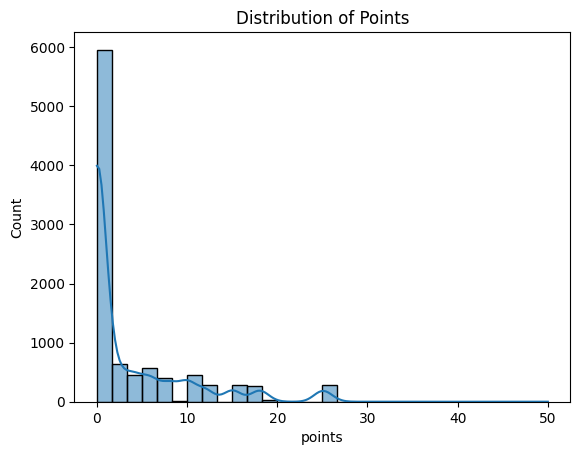

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(final_df['points'], bins=30, kde=True)
plt.title('Distribution of Points')
plt.show()


In [253]:
final_df = final_df.drop_duplicates()
final_df.shape

(9600, 19)

In [255]:
final_df

,Unnamed: 0,driver_number,position,points,grid,laps,status,driver_id,constructor_id,fastest_lap_rank,fastest_lap,fastest_lap_time,fastest_lap_speed,raceName,season,driverId,dateOfBirth,nationality,driverFullName
date,,,,,,,,,,,,,,,,,,,
2000-03-12,0,3,1,10.0,3,58,Finished,michael_schumacher,ferrari,1,1,1,1,Australian Grand Prix,2000,michael_schumacher,1969-01-03,German,Michael Schumacher
2000-03-12,10,4,2,6.0,4,58,Finished,barrichello,ferrari,1,1,1,1,Australian Grand Prix,2000,barrichello,1972-05-23,Brazilian,Rubens Barrichello
2000-03-12,22,9,3,4.0,11,58,Finished,ralf_schumacher,williams,1,1,1,1,Australian Grand Prix,2000,ralf_schumacher,1975-06-30,German,Ralf Schumacher
2000-03-12,30,22,4,3.0,8,58,Finished,villeneuve,bar,1,1,1,1,Australian Grand Prix,2000,villeneuve,1971-04-09,Canadian,Jacques Villeneuve
2000-03-12,37,11,5,2.0,9,58,Finished,fisichella,benetton,1,1,1,1,Australian Grand Prix,2000,fisichella,1973-01-14,Italian,Giancarlo Fisichella
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-26,89217,2,16,0.0,20,58,Finished,sargeant,williams,0,0,0,0,Abu Dhabi Grand Prix,2023,sargeant,2000-12-31,American,Logan Sargeant
2023-11-26,89218,24,17,0.0,19,58,Finished,zhou,alfa,0,0,0,0,Abu Dhabi Grand Prix,2023,zhou,1999-05-30,Chinese,Guanyu Zhou
2023-11-26,89220,55,18,0.0,16,57,Retired,sainz,ferrari,0,0,0,0,Abu Dhabi Grand Prix,2023,sainz,1994-09-01,Spanish,Carlos Sainz


In [264]:
!pip install squarify


In [280]:
import plotly.express as px
import pandas as pd
import plotly.io as pio

# Assuming 'driver_nationality_counts' is already prepared with 'nationality' and 'Number of Unique Drivers'
# If 'driver_nationality_counts' is not a DataFrame, convert it first
if not isinstance(driver_nationality_counts, pd.DataFrame):
    driver_nationality_counts = driver_nationality_counts.reset_index(name='Number of Unique Drivers')

# Creating the sunburst chart
fig = px.sunburst(driver_nationality_counts,
                  path=['nationality'],  # This defines the hierarchy levels; in this case, it's just nationality
                  values='Number of Unique Drivers',  # Sizes of the segments
                  color='Number of Unique Drivers',  # Color scale based on the number of drivers
                  color_continuous_scale='Viridis',  # A visually appealing color scale
                  title='Distribution of Unique Formula 1 Drivers by Nationality (2000–2023)')

# Convert the figure to HTML with CDN links
html_content = pio.to_html(fig, include_plotlyjs='cdn')

# Write the HTML content to a file
with open('sunburst_chart.html', 'w') as html_file:
    html_file.write(html_content)

In [276]:
import plotly.express as px

# Assuming 'driver_nationality_counts' is already prepared with 'nationality' and 'Number of Unique Drivers'
# If 'driver_nationality_counts' is not a DataFrame, convert it first
if not isinstance(driver_nationality_counts, pd.DataFrame):
    driver_nationality_counts = driver_nationality_counts.reset_index(name='Number of Unique Drivers')

# Creating the sunburst chart
fig = px.sunburst(driver_nationality_counts,
                  path=['nationality'],  # This defines the hierarchy levels; in this case, it's just nationality
                  values='Number of Unique Drivers',  # Sizes of the segments
                  color='Number of Unique Drivers',  # Color scale based on the number of drivers
                  color_continuous_scale='Viridis',  # A visually appealing color scale
                  title='Distribution of Unique Formula 1 Drivers by Nationality (2000–2023)')

# Display the figure
fig.show()


The sunburst chart titled "Distribution of Unique Formula 1 Drivers by Nationality (2000–2023)" is a radial, hierarchical visualization that displays the proportion of unique Formula 1 drivers by nationality. Although the actual chart isn't displayed here due to the text-based nature of this interaction, we can discuss the typical interpretations and insights one might derive from such a visualization:

### Visual Structure and Interpretation
- **Hierarchical Representation:** A sunburst chart is designed to illustrate hierarchical relationships through concentric circles. In this specific case, the hierarchy is flat with only one level represented—nationality—making it straightforward to interpret the proportion of drivers from each country.
  
- **Proportional Segments:** Each segment's size corresponds to the number of unique drivers from that nationality, offering a clear visual indicator of which countries have had the most significant impact on Formula 1 in terms of driver representation. Larger segments indicate a higher number of drivers from those nationalities.

- **Color Coding:** The use of a continuous color scale (e.g., 'Viridis') helps distinguish between segments based on their size, with different hues indicating the relative magnitude of unique drivers. This color coding adds an additional layer of interpretability, making it easier to identify nationalities with a larger presence in Formula 1.

### Insights
- **Dominant Nationalities:** The chart effectively highlights nationalities that dominate the sport, revealing insights into the global distribution of talent. Countries with larger segments have historically contributed more drivers to Formula 1, indicating strong motorsport cultures and developmental programs.
  
- **Global Diversity:** The distribution of segments across the chart reflects the international appeal and diversity of Formula 1. Seeing a wide range of nationalities represented underscores the sport's global reach and the variety of pathways through which drivers ascend to its highest levels.

- **Strategic Implications:** For teams, sponsors, and promoters, understanding the nationality distribution of drivers can inform decisions related to talent scouting, marketing strategies, and efforts to grow the sport's fan base in underrepresented regions.

### Conclusion
The sunburst chart serves not only as a visual representation of data but also as a tool for exploring and understanding the composition of Formula 1's driver base over the years. By revealing the proportional representation of drivers by nationality, the chart underscores the sport's global nature and the varying degrees to which different countries contribute to its talent pool.

In [277]:
fig.write_html("plot1.html")

<ipython-input-257-d00803217357>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




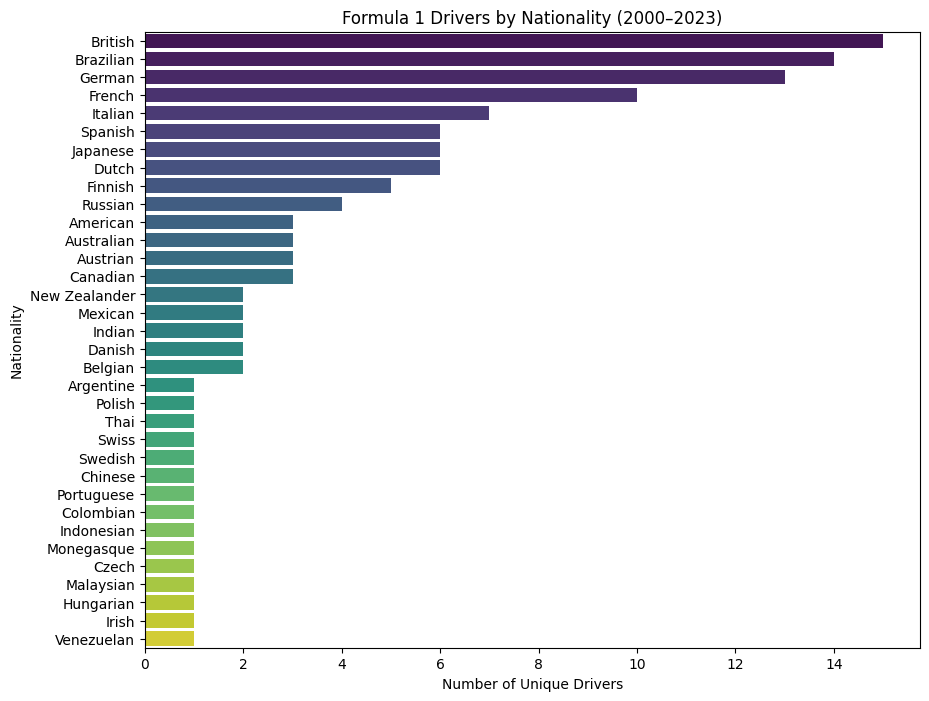

In [257]:
# Grouping the data by nationality and driver full name to count unique drivers by nationality
driver_nationality_counts = final_df.groupby('nationality')['driverFullName'].nunique().sort_values(ascending=False)

# Converting the Series into a DataFrame for plotting
driver_nationality_df = driver_nationality_counts.reset_index(name='Number of Drivers')

# Plotting the modified countplot for driver nationalities with the unique count of drivers
plt.figure(figsize=(10, 8))
sns.barplot(y='nationality', x='Number of Drivers', data=driver_nationality_df, palette="viridis")
plt.title('Formula 1 Drivers by Nationality (2000–2023)')
plt.xlabel('Number of Unique Drivers')
plt.ylabel('Nationality')
plt.show()


The modified bar plot titled "Unique Formula 1 Drivers by Nationality (2000–2023)" now accurately reflects the count of unique drivers from each nationality, rather than the total number of entries by nationality in the dataset. This approach provides a clearer view of the diversity and representation of drivers in Formula 1 over the specified period.

### Key Interpretations:

- **Representation Diversity:** The plot highlights the diversity in Formula 1, showcasing a wide array of nationalities. The length of each bar indicates the number of unique drivers from each country, providing insight into which countries have a strong presence in Formula 1 racing.

- **Dominance and Depth:** Countries with longer bars at the top of the plot represent a significant contribution to the pool of Formula 1 talent, indicating a robust motorsport culture, infrastructure, and support systems that nurture world-class drivers.

- **Global Reach:** The distribution across many nationalities underlines Formula 1's global reach and appeal, with talents emerging from different continents and cultural backgrounds.

- **Strategic Insights:** For teams, sponsors, and promoters, understanding the national diversity of drivers can inform strategic decisions related to talent scouting, marketing, and expanding the sport's global fan base.

This visualization not only serves as an acknowledgment of the sport's international nature but also as a tool for analyzing trends in driver development and national representation in Formula 1.

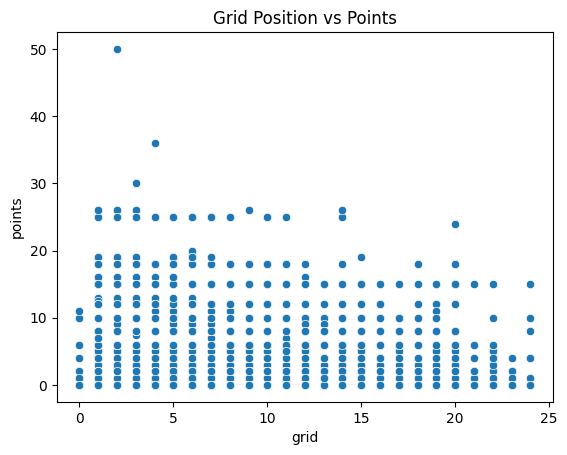

In [ ]:
sns.scatterplot(x='grid', y='points', data=final_df)
plt.title('Grid Position vs Points')
plt.show()

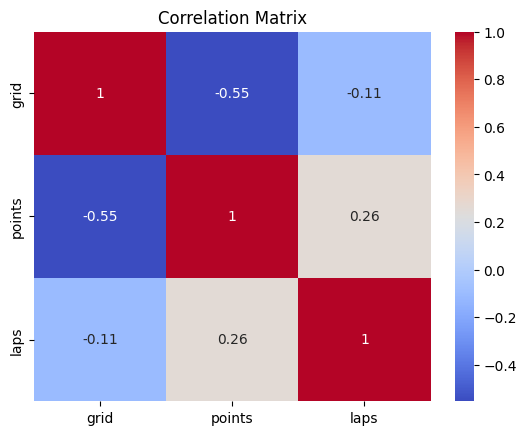

In [ ]:
# Correlation matrix
corr = final_df[['grid', 'points', 'laps']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [279]:
plt.savefig('plot2.png')

<Figure size 640x480 with 0 Axes>

The heatmap displaying the correlation matrix for 'grid', 'points', and 'laps' from the dataset offers insights into the relationships between these three key racing metrics. Here’s a detailed interpretation of each correlation presented in the heatmap:

### Grid vs. Points (Negative Correlation)
- The negative correlation between 'grid' and 'points' suggests that a lower grid position (closer to position 1) tends to result in higher points. This is expected in Formula 1 racing, as starting closer to the front of the grid generally provides a competitive advantage, reducing the need for overtaking and increasing the chances of finishing the race in a points-scoring position.

### Grid vs. Laps (Negative Correlation)
- The negative correlation here is less pronounced than with points but suggests that drivers starting from better grid positions are slightly more likely to complete a higher number of laps. While the correlation is weaker, it could imply that starting from the front reduces the risk of early incidents typical in the midfield or back of the pack, leading to higher lap completions.

### Points vs. Laps (Positive Correlation)
- The positive correlation between 'points' and 'laps' indicates that drivers who complete more laps are more likely to score points. This relationship is intuitive since finishing races (and thus completing more laps) is fundamental to being classified in a position that awards points. This correlation underscores the importance of reliability and consistency in achieving competitive results.

### Overall Interpretation
- The heatmap succinctly captures the interplay between starting grid positions, race completion (measured in laps), and the ultimate goal of scoring points.
- It highlights the competitive dynamics of Formula 1, where both strategic qualifying performances (to secure a good grid spot) and race execution (completing laps) are critical to success.
- The visualization reinforces common racing strategies: securing a strong qualifying position can lead to higher points finishes by reducing on-track battles and risks, while the ability to complete races (laps) directly impacts points accumulation over a season.
- For teams and drivers, understanding these correlations can inform strategies for both qualifying and race management, emphasizing the importance of grid positions and the need for reliability and consistency in race performance.

This heatmap serves as a valuable analytical tool, offering a quantitative basis for strategies and decisions within the competitive context of Formula 1 racing.

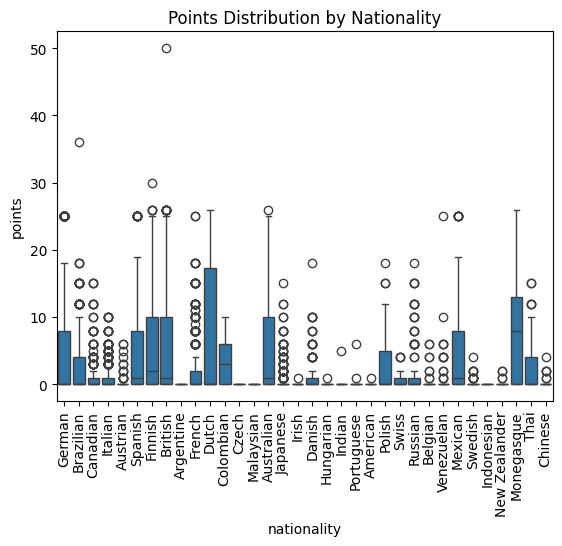

In [ ]:
sns.boxplot(x='nationality', y='points', data=final_df)
plt.xticks(rotation=90)
plt.title('Points Distribution by Nationality')
plt.show()


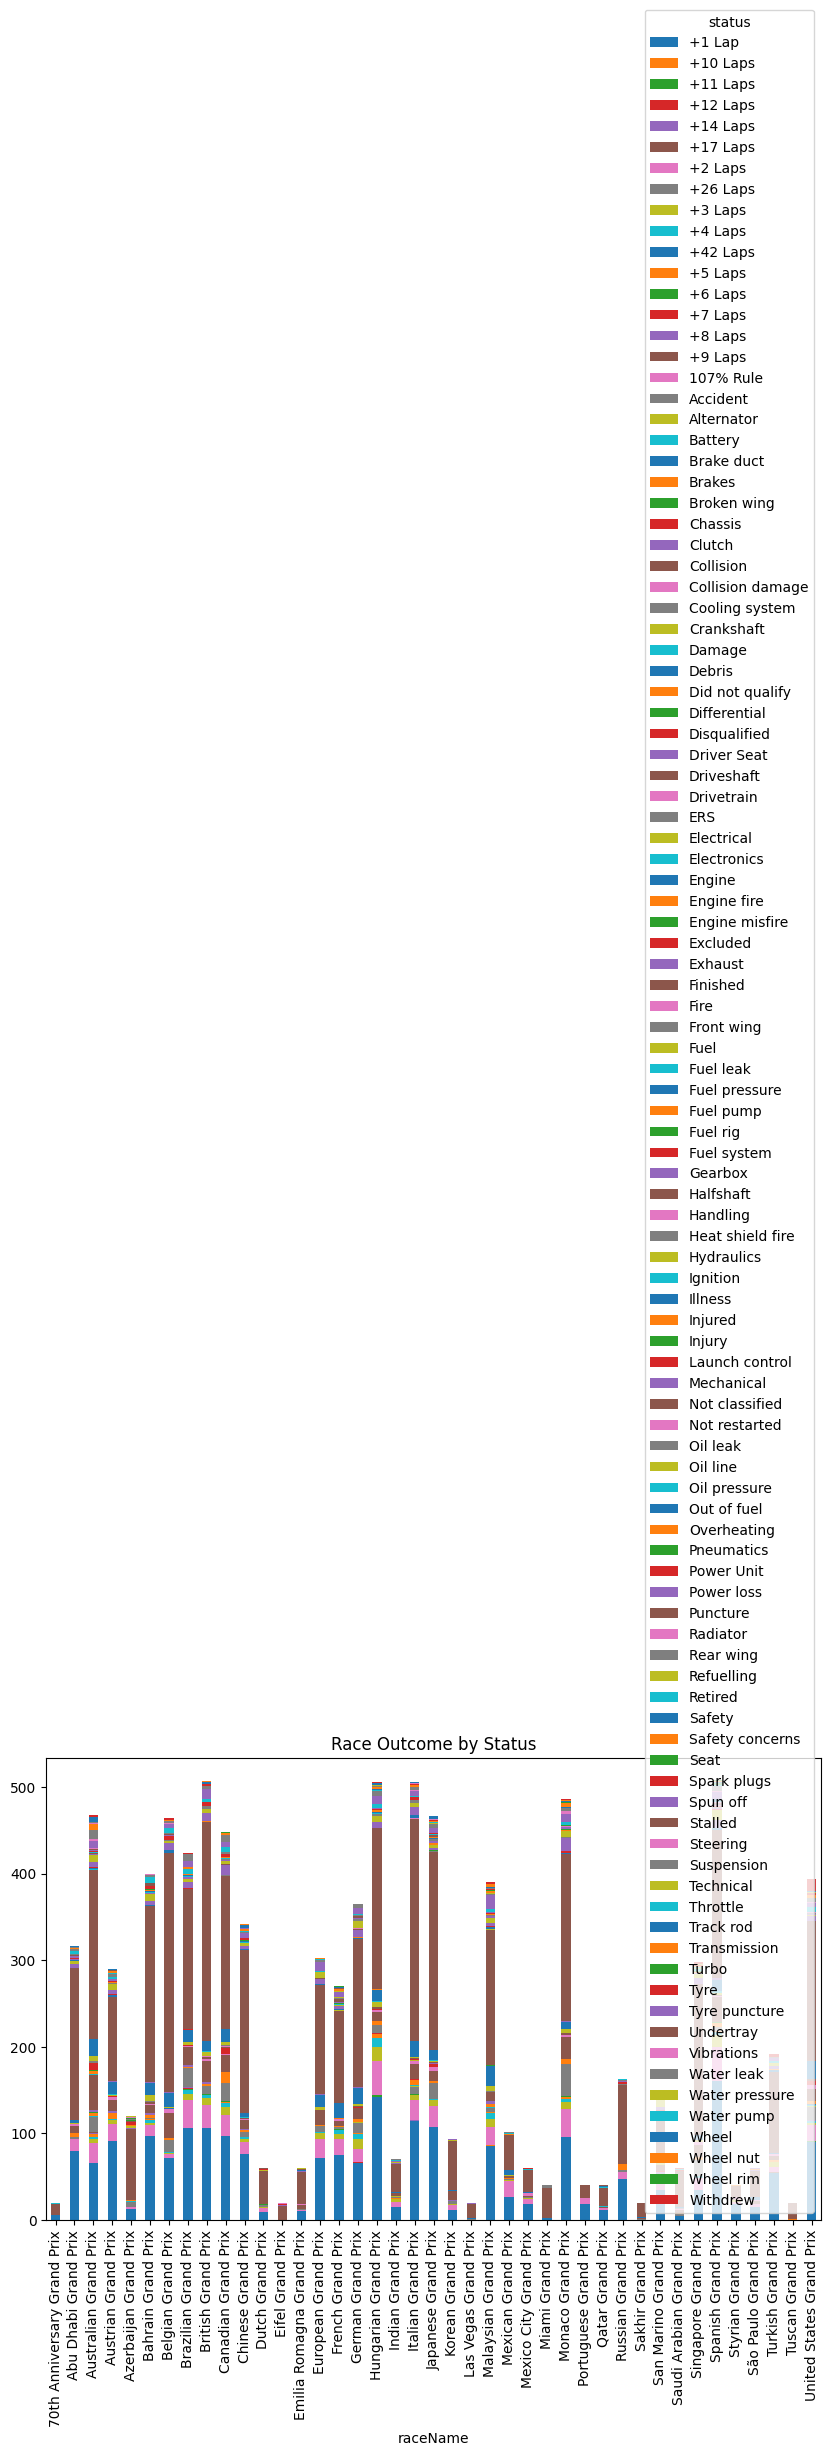

In [ ]:
pd.crosstab(final_df['raceName'], final_df['status']).plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Race Outcome by Status')
plt.show()


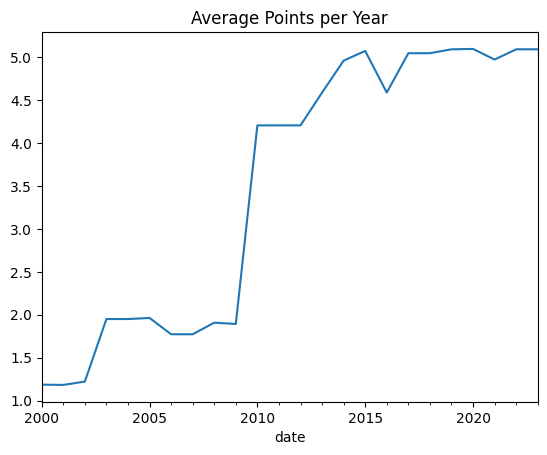

In [ ]:
final_df['date'] = pd.to_datetime(final_df['date'])
final_df.set_index('date', inplace=True)

final_df['points'].resample('A').mean().plot()
plt.title('Average Points per Year')
plt.show()


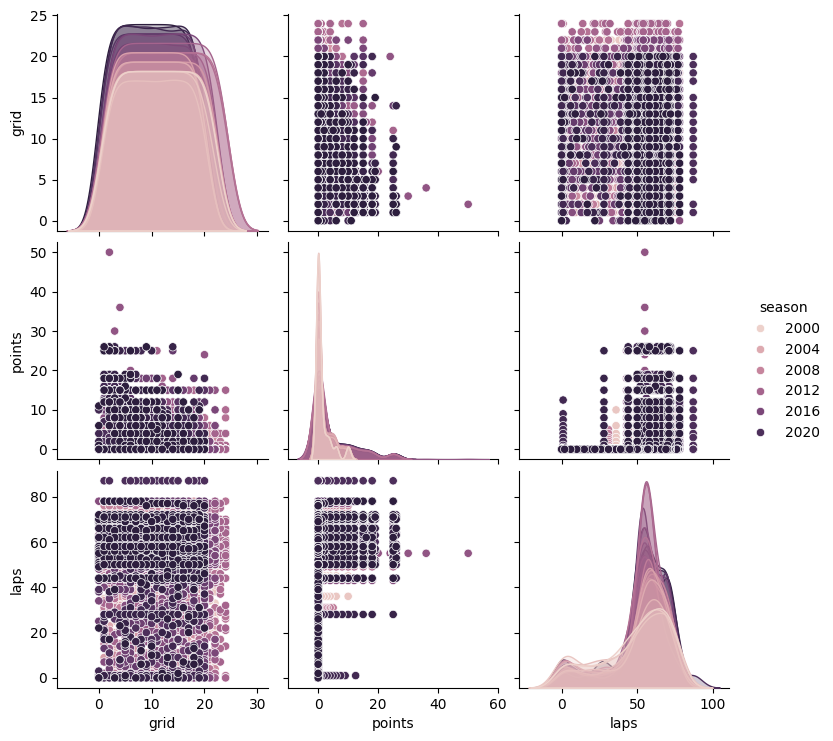

In [ ]:
sns.pairplot(final_df[['grid', 'points', 'laps', 'season']], hue='season')


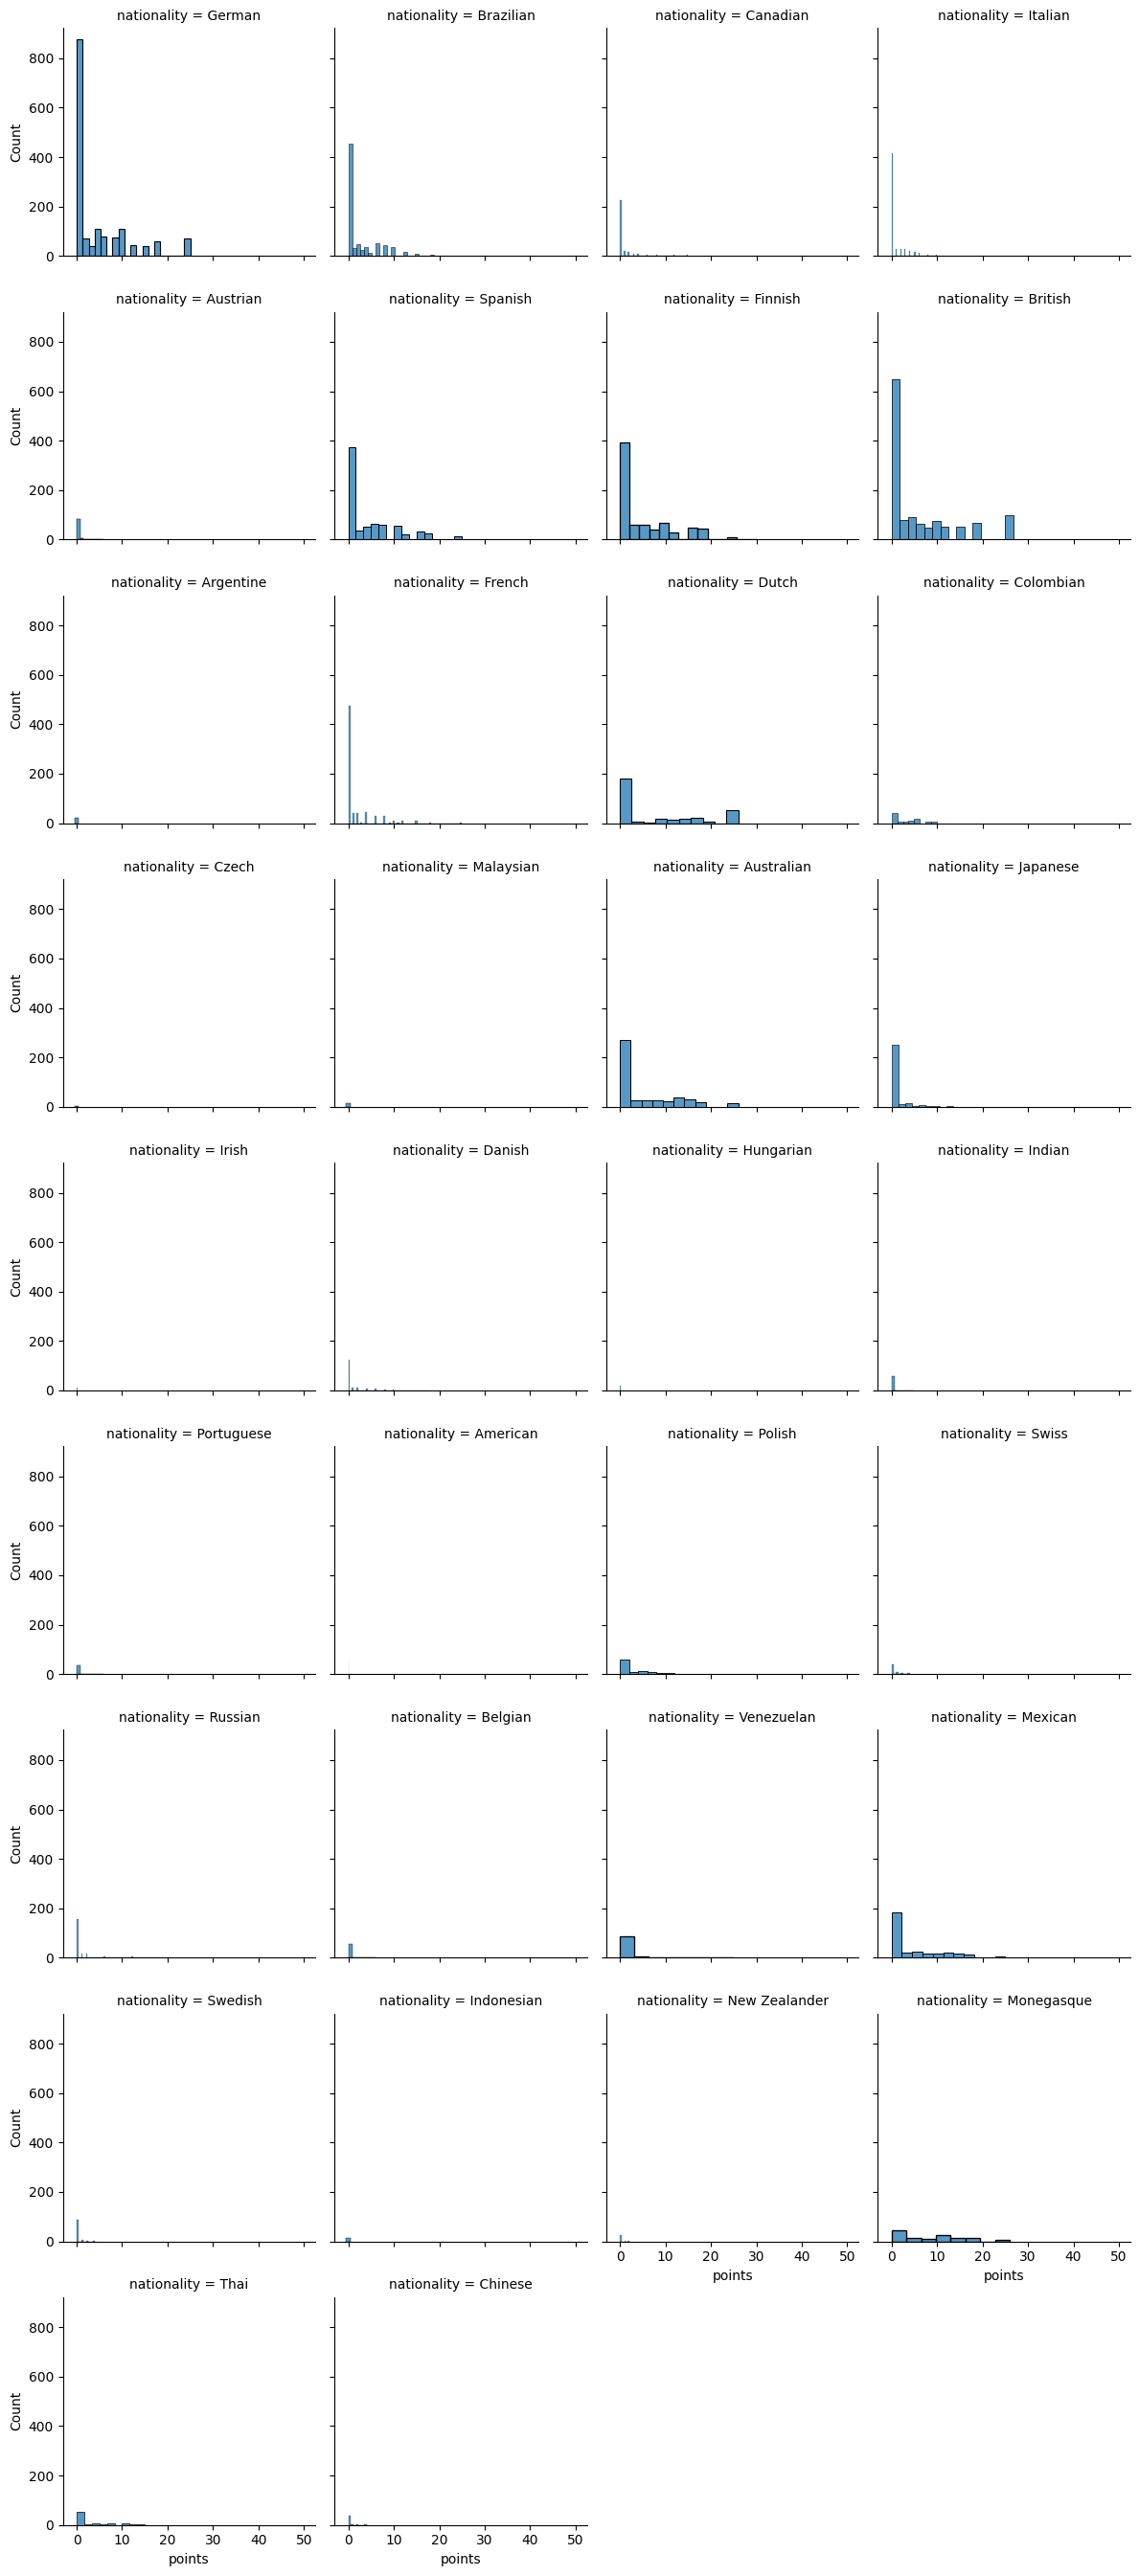

In [ ]:
g = sns.FacetGrid(final_df, col='nationality', col_wrap=4, height=3)
g.map(sns.histplot, 'points')


In [330]:
import plotly.express as px
import pandas as pd

# Load your dataset
df = pd.read_csv('final_df.csv')

# Transform 'driverId' to have capitalized names with spaces
df['driverId'] = df['driverId'].apply(lambda x: ' '.join(word.capitalize() for word in x.split('_')))

# Grouping data to get total points per driver per season
season_points = df.groupby(['season', 'driverId'])['points'].sum().reset_index()

fig = px.line(season_points, x='season', y='points', color='driverId',
              title='Driver Performance Comparison Across Seasons(2000-2023)',
              labels={'season': 'Season', 'points': 'Total Points', 'driverId': 'Driver'})

fig.show()

<ipython-input-171-7393be004ac1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['win'] = (filtered_df['position'] == 1).astype(int)
<ipython-input-171-7393be004ac1>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='win', y='driverFullName', data=top_5_drivers,


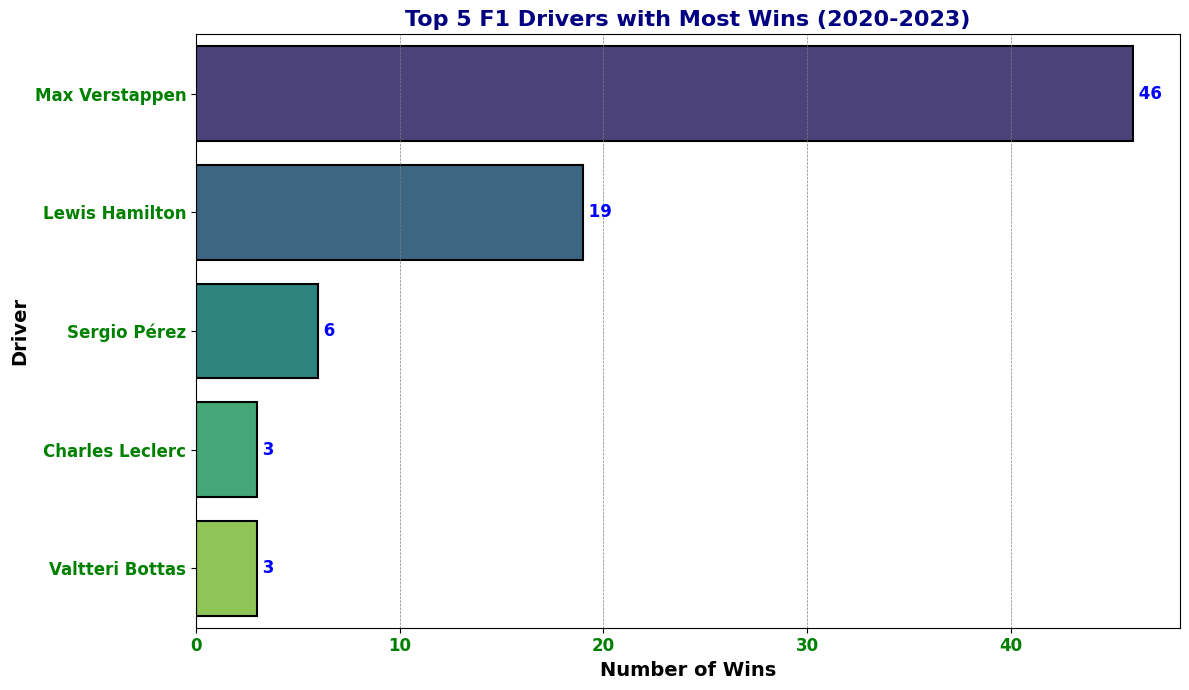

In [ ]:
# Ensure you have the final_df DataFrame loaded with the relevant data
# Filter the DataFrame for the desired seasons
filtered_df = final_df[(final_df['season'] >= 2020) & (final_df['season'] <= 2023)]

# Assuming 'position' is a numerical column where 1 indicates a win
# Create a column to indicate wins
filtered_df['win'] = (filtered_df['position'] == 1).astype(int)

# Aggregate wins by driver
wins_by_driver = filtered_df.groupby('driverFullName')['win'].sum().reset_index()

# Sort the drivers by wins in descending order and take the top 5
top_5_drivers = wins_by_driver.sort_values(by='win', ascending=False).head(5)

top_5_drivers
# Setting up the plot
plt.figure(figsize=(12, 7))

# Creating a barplot
sns.barplot(x='win', y='driverFullName', data=top_5_drivers,
            palette='viridis', edgecolor='black', linewidth=1.5)

# Adding titles and labels
plt.title('Top 5 F1 Drivers with Most Wins (2020-2023)', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Number of Wins', fontsize=14, fontweight='bold')
plt.ylabel('Driver', fontsize=14, fontweight='bold')

# Customizing the ticks
plt.xticks(fontsize=12, fontweight='bold', color='green')
plt.yticks(fontsize=12, fontweight='bold', color='green')

# Adding a grid for better readability
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='x')

# Adding values on top of the bars for better readability
for index, value in enumerate(top_5_drivers['win']):
    plt.text(value, index, f" {value}", color='blue', fontsize=12, fontweight='bold', va='center')

plt.tight_layout()
plt.show()


In [286]:
filtered_df.tail(20)

,Unnamed: 0,driver_number,position,points,grid,laps,status,driver_id,constructor_id,fastest_lap_rank,fastest_lap,fastest_lap_time,fastest_lap_speed,raceName,season,driverId,dateOfBirth,nationality,driverFullName,win
date,,,,,,,,,,,,,,,,,,,,
2023-11-26,89088,1,1,26.0,1,58,Finished,max_verstappen,red_bull,0,0,0,0,Abu Dhabi Grand Prix,2023,max_verstappen,1997-09-30,Dutch,Max Verstappen,1
2023-11-26,89097,16,2,18.0,2,58,Finished,leclerc,ferrari,0,0,0,0,Abu Dhabi Grand Prix,2023,leclerc,1997-10-16,Monegasque,Charles Leclerc,0
2023-11-26,89103,63,3,15.0,4,58,Finished,russell,mercedes,0,0,0,0,Abu Dhabi Grand Prix,2023,russell,1998-02-15,British,George Russell,0
2023-11-26,89108,11,4,12.0,9,58,Finished,perez,red_bull,0,0,0,0,Abu Dhabi Grand Prix,2023,perez,1990-01-26,Mexican,Sergio Pérez,0
2023-11-26,89121,4,5,10.0,5,58,Finished,norris,mclaren,0,0,0,0,Abu Dhabi Grand Prix,2023,norris,1999-11-13,British,Lando Norris,0
2023-11-26,89126,81,6,8.0,3,58,Finished,piastri,mclaren,0,0,0,0,Abu Dhabi Grand Prix,2023,piastri,2001-04-06,Australian,Oscar Piastri,0
2023-11-26,89127,14,7,6.0,7,58,Finished,alonso,aston_martin,0,0,0,0,Abu Dhabi Grand Prix,2023,alonso,1981-07-29,Spanish,Fernando Alonso,0
2023-11-26,89147,22,8,4.0,6,58,Finished,tsunoda,alphatauri,0,0,0,0,Abu Dhabi Grand Prix,2023,tsunoda,2000-05-11,Japanese,Yuki Tsunoda,0
2023-11-26,89150,44,9,2.0,11,58,Finished,hamilton,mercedes,0,0,0,0,Abu Dhabi Grand Prix,2023,hamilton,1985-01-07,British,Lewis Hamilton,0


In [305]:
import plotly.graph_objects as go

# Define a color scale (you can choose any Plotly color scale)
color_scale = 'Viridis'

# Create a Plotly bar chart
fig = go.Figure()

# Add bar trace
fig.add_trace(go.Bar(
    x=top_5_drivers['win'],
    y=top_5_drivers['driverFullName'],
    orientation='h',  # Horizontal bar chart
    hoverinfo='x+text',  # Display wins and driver's name on hover
    marker=dict(color=top_5_drivers['win'], colorbar=dict(title='Number of Wins', tickvals=top_5_drivers['win'], ticktext=top_5_drivers['win']), colorscale=color_scale),  # Use color scale for bars
))

# Update layout
fig.update_layout(
    title='Top 5 F1 Drivers with Most Wins (2020-2023)',
    xaxis=dict(title='Number of Wins'),
    yaxis=dict(title='Driver'),
    font=dict(size=12, color='black'),  # Font settings
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Transparent background
    bargap=0.15,  # Gap between bars
    hoverlabel=dict(font=dict(size=12))  # Font size for hover label
)

# Add constructor names to hover text
hover_text = []
for driver in top_5_drivers['driverFullName']:
    constructor_name = filtered_df[filtered_df['driverFullName'] == driver].iloc[0]['constructor_id']
    constructor_name = constructor_name.replace("_", " ").title()  # Capitalize and insert spaces if underscore
    hover_text.append(f'{driver}<br>Constructor Team: {constructor_name}')
fig.data[0].hovertext = hover_text

# Show the Plotly graph
fig.show()


In [307]:
import plotly.graph_objects as go

# Ensure you have the final_df DataFrame loaded with the relevant data
# Filter the DataFrame for the desired seasons
filtered_df = final_df[(final_df['season'] >= 2021) & (final_df['season'] <= 2023)]

# Assuming 'position' is a numerical column where 1 indicates a win
# Create a column to indicate wins
filtered_df['win'] = (filtered_df['position'] == 1).astype(int)

# Aggregate wins by driver
wins_by_driver = filtered_df.groupby('driverFullName')['win'].sum().reset_index()

# Sort the drivers by wins in descending order and take the top 5
top_5_drivers = wins_by_driver.sort_values(by='win', ascending=False).head(5)

top_5_drivers

# Create a Plotly bar chart
fig = go.Figure()

# Add bar trace
fig.add_trace(go.Bar(
    x=top_5_drivers['win'],
    y=top_5_drivers['driverFullName'],
    orientation='h',  # Horizontal bar chart
    hoverinfo='x+text',  # Display wins and driver's name on hover
    marker=dict(color='rgba(50, 171, 96, 0.6)', line=dict(color='rgba(50, 171, 96, 1.0)', width=1)),  # Bar color and border
))

# Update layout
fig.update_layout(
    title='Top 5 F1 Drivers with Most Wins (2021-2023)',
    xaxis=dict(title='Number of Wins'),
    yaxis=dict(title='Driver'),
    font=dict(size=12, color='black'),  # Font settings
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Transparent background
    bargap=0.15,  # Gap between bars
    hoverlabel=dict(font=dict(size=12))  # Font size for hover label
)

# Add constructor names to hover text
hover_text = []
for driver in top_5_drivers['driverFullName']:
    constructor_name = filtered_df[filtered_df['driverFullName'] == driver].iloc[0]['constructor_id']
    constructor_name = constructor_name.replace("_", " ").title()
    hover_text.append(f'{driver}<br>Constructor Team: {constructor_name}')
fig.data[0].hovertext = hover_text

# Show the Plotly graph
fig.show()


# Convert the figure to HTML with CDN links
html_content = pio.to_html(fig, include_plotlyjs='cdn')

# Write the HTML content to a file
with open('bar_chart.html', 'w') as html_file:
    html_file.write(html_content)

<ipython-input-307-2b4f26963406>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
constructor_standings_df.head()

,season,MRData.xmlns,MRData.series,MRData.url,MRData.limit,MRData.offset,MRData.total,MRData.StandingsTable.season,MRData.StandingsTable.StandingsLists
0,2000,http://ergast.com/mrd/1.5,f1,http://ergast.com/api/f1/2000/constructorstand...,1000,0,11,2000,"[{'season': '2000', 'round': '17', 'Constructo..."
1,2001,http://ergast.com/mrd/1.5,f1,http://ergast.com/api/f1/2001/constructorstand...,1000,0,11,2001,"[{'season': '2001', 'round': '17', 'Constructo..."
2,2002,http://ergast.com/mrd/1.5,f1,http://ergast.com/api/f1/2002/constructorstand...,1000,0,11,2002,"[{'season': '2002', 'round': '17', 'Constructo..."
3,2003,http://ergast.com/mrd/1.5,f1,http://ergast.com/api/f1/2003/constructorstand...,1000,0,10,2003,"[{'season': '2003', 'round': '16', 'Constructo..."
4,2004,http://ergast.com/mrd/1.5,f1,http://ergast.com/api/f1/2004/constructorstand...,1000,0,10,2004,"[{'season': '2004', 'round': '18', 'Constructo..."


In [ ]:
# Selecting and renaming relevant columns
constructor_standings_df_relevant = constructor_standings_df[['season', 'MRData.total', 'MRData.StandingsTable.StandingsLists']].copy()
constructor_standings_df_relevant.rename(columns={
    'MRData.total': 'Total Constructors',
    'MRData.StandingsTable.StandingsLists': 'Standings Details'
}, inplace=True)

# Display the first few rows of the modified DataFrame
constructor_standings_df_relevant.head()


,season,Total Constructors,Standings Details
0,2000,11,"[{'season': '2000', 'round': '17', 'Constructo..."
1,2001,11,"[{'season': '2001', 'round': '17', 'Constructo..."
2,2002,11,"[{'season': '2002', 'round': '17', 'Constructo..."
3,2003,10,"[{'season': '2003', 'round': '16', 'Constructo..."
4,2004,10,"[{'season': '2004', 'round': '18', 'Constructo..."


In [ ]:
import pandas as pd
import json

# Your existing DataFrame is `constructor_standings_df_relevant`

# Function to parse and extract constructor standings details
def parse_standings_details(details):
    # Load the JSON data
    standings_details = json.loads(details.replace("'", "\""))

    # Extract details
    extracted_data = []
    for item in standings_details:
        for constructor_standing in item['ConstructorStandings']:
            extracted_data.append({
                'wins': constructor_standing['wins'],
                'points': constructor_standing['points'],
                'position': constructor_standing['position'],
                'constructor_name': constructor_standing['Constructor']['name']
            })
    return extracted_data

# Initialize an empty list to hold all rows of the new DataFrame
expanded_rows = []

# Iterate through each row of the original DataFrame to extract and expand standings details
for index, row in constructor_standings_df_relevant.iterrows():
    season = row['season']
    constructors_details = parse_standings_details(row['Standings Details'])
    for detail in constructors_details:
        detail['season'] = season  # Add the season year to each row of details
        expanded_rows.append(detail)

# Create a new DataFrame from the expanded rows
expanded_df = pd.DataFrame(expanded_rows)

# Display the first few rows of the new DataFrame
expanded_df.to_csv("f1_constructor_standings_cleaned.csv")


In [ ]:
expanded_df

,wins,points,position,constructor_name,season
0,10,170,1,Ferrari,2000
1,7,162,2,McLaren,2000
2,0,36,3,Williams,2000
3,0,20,4,Benetton,2000
4,0,20,5,BAR,2000
...,...,...,...,...,...
251,0,120,6,Alpine F1 Team,2023
252,0,28,7,Williams,2023
253,0,25,8,AlphaTauri,2023
254,0,16,9,Alfa Romeo,2023


In [ ]:
constructor_standings_df = pd.read_csv("f1_constructor_standings_cleaned.csv")

In [309]:
import plotly.express as px
import pandas as pd

# Assuming 'constructor_standings_df' is your DataFrame
# Filter the DataFrame to include only teams with at least one win
teams_with_wins = constructor_standings_df[constructor_standings_df['wins'] > 0]

# Group by 'constructor_name', sum the wins, and sort in descending order
total_wins_by_team_filtered = teams_with_wins.groupby('constructor_name')['wins'].sum().sort_values(ascending=False)

# Use Plotly to create the bar chart with a catchy title
fig = px.bar(total_wins_by_team_filtered.reset_index(), x='constructor_name', y='wins',
             title='Formula 1 Glory: Top Team Victories (2000–2023)',
             labels={'constructor_name': 'Constructor Name', 'wins': 'Total Wins'},
             color='wins', color_continuous_scale='Plasma')  # Using "Plasma" color scale for visual appeal

fig.update_layout(
    xaxis_title='Constructor Name',
    yaxis_title='Total Race Wins',
    coloraxis_colorbar=dict(
        title='Total Wins'
    ),
    xaxis={'categoryorder': 'total descending'}
)

# Show the plot
fig.show()


# Convert the figure to HTML with CDN links
html_content = pio.to_html(fig, include_plotlyjs='cdn')

# Write the HTML content to a file
with open('bar_chart1.html', 'w') as html_file:
    html_file.write(html_content)

The interactive bar plot titled "Formula 1 Glory: Top Team Victories (2000–2023)" showcases the cumulative race victories of Formula 1 teams over the specified period. This visualization is designed to highlight the most successful constructors based on their total number of wins, providing insights into the competitive landscape of Formula 1 racing.

### Key Interpretations:

1. **Dominance of Top Teams:** The graph reveals which teams have been most dominant in terms of race victories. Teams with higher bars have secured more race wins, indicating their competitive strength and consistency in performance across seasons.

2. **Competitive Hierarchy:** The distribution of wins illustrates a competitive hierarchy within Formula 1. Teams at the top of the chart, with the most wins, are the powerhouses of the sport, often with significant resources, advanced technology, and top-tier drivers. The visual gap between these teams and those with fewer wins underscores the challenges of competing at the highest levels of motorsport.

3. **Evolving Team Performances:** While the chart focuses on the total wins from 2000 to 2023, underlying this data is the story of how team performances have evolved. Some teams may have had periods of dominance followed by less competitive seasons, reflecting changes in regulations, technology, and team dynamics.

4. **Legacy and History:** The visualization also serves as a testament to the legacy and history of the teams within Formula 1. Teams with a rich history of victories have contributed significantly to the sport's narrative, creating lasting legacies that influence their brand and fan base.

5. **Color Gradient as an Indicator:** The use of a color gradient (in this case, the "Plasma" color scale) not only makes the plot visually appealing but also serves as an indicator of the number of wins. Darker or more vibrant colors indicate a higher number of victories, providing a quick visual cue to identify the most successful teams.

### Conclusion:

This bar plot not only offers a quantitative analysis of race victories by team but also invites reflection on the factors contributing to sustained success in Formula 1. It highlights the importance of innovation, strategic decision-making, and the ability to attract and retain top driving talent. For stakeholders, fans, and analysts, the visualization provides a compelling overview of which teams have shaped the sport from 2000 to 2023, emphasizing the achievements and the competitive spirit that define Formula 1.

In [ ]:
race_results_df.head()

,driver_number,position,points,grid,laps,status,driver_id,constructor_id,fastest_lap_rank,fastest_lap,fastest_lap_time,fastest_lap_speed_units,fastest_lap_speed,raceName,date,season
0,3,1,10.0,3,58,Finished,michael_schumacher,ferrari,1,1,1,NaN,1,Australian Grand Prix,2000-03-12,2000
1,4,2,6.0,4,58,Finished,barrichello,ferrari,1,1,1,NaN,1,Australian Grand Prix,2000-03-12,2000
2,9,3,4.0,11,58,Finished,ralf_schumacher,williams,1,1,1,NaN,1,Australian Grand Prix,2000-03-12,2000
3,22,4,3.0,8,58,Finished,villeneuve,bar,1,1,1,NaN,1,Australian Grand Prix,2000-03-12,2000
4,11,5,2.0,9,58,Finished,fisichella,benetton,1,1,1,NaN,1,Australian Grand Prix,2000-03-12,2000


In [ ]:
race_results_drivers.head()

,driver_number,position,points,grid,laps,status,driver_id,constructor_id,fastest_lap_rank,fastest_lap,fastest_lap_time,fastest_lap_speed,raceName,date,season,driverId,dateOfBirth,nationality,driverFullName
0,3,1,10.0,3,58,Finished,michael_schumacher,ferrari,1,1,1,1,Australian Grand Prix,2000-03-12,2000,michael_schumacher,1969-01-03,German,Michael Schumacher
10,4,2,6.0,4,58,Finished,barrichello,ferrari,1,1,1,1,Australian Grand Prix,2000-03-12,2000,barrichello,1972-05-23,Brazilian,Rubens Barrichello
22,9,3,4.0,11,58,Finished,ralf_schumacher,williams,1,1,1,1,Australian Grand Prix,2000-03-12,2000,ralf_schumacher,1975-06-30,German,Ralf Schumacher
30,22,4,3.0,8,58,Finished,villeneuve,bar,1,1,1,1,Australian Grand Prix,2000-03-12,2000,villeneuve,1971-04-09,Canadian,Jacques Villeneuve
37,11,5,2.0,9,58,Finished,fisichella,benetton,1,1,1,1,Australian Grand Prix,2000-03-12,2000,fisichella,1973-01-14,Italian,Giancarlo Fisichella


In [ ]:
race_df = pd.read_csv("f1_drivers_2000_2023.csv")
race_df.head()

,driverId,url,givenName,familyName,dateOfBirth,nationality,season,code,permanentNumber
0,alesi,http://en.wikipedia.org/wiki/Jean_Alesi,Jean,Alesi,1964-06-11,French,2000,NaN,NaN
1,barrichello,http://en.wikipedia.org/wiki/Rubens_Barrichello,Rubens,Barrichello,1972-05-23,Brazilian,2000,BAR,NaN
2,burti,http://en.wikipedia.org/wiki/Luciano_Burti,Luciano,Burti,1975-03-05,Brazilian,2000,NaN,NaN
3,button,http://en.wikipedia.org/wiki/Jenson_Button,Jenson,Button,1980-01-19,British,2000,BUT,22.0
4,coulthard,http://en.wikipedia.org/wiki/David_Coulthard,David,Coulthard,1971-03-27,British,2000,COU,NaN


In [ ]:
constructor_standings_df.head()

,season,MRData.xmlns,MRData.series,MRData.url,MRData.limit,MRData.offset,MRData.total,MRData.StandingsTable.season,MRData.StandingsTable.StandingsLists
0,2000,http://ergast.com/mrd/1.5,f1,http://ergast.com/api/f1/2000/constructorstand...,1000,0,11,2000,"[{'season': '2000', 'round': '17', 'Constructo..."
1,2001,http://ergast.com/mrd/1.5,f1,http://ergast.com/api/f1/2001/constructorstand...,1000,0,11,2001,"[{'season': '2001', 'round': '17', 'Constructo..."
2,2002,http://ergast.com/mrd/1.5,f1,http://ergast.com/api/f1/2002/constructorstand...,1000,0,11,2002,"[{'season': '2002', 'round': '17', 'Constructo..."
3,2003,http://ergast.com/mrd/1.5,f1,http://ergast.com/api/f1/2003/constructorstand...,1000,0,10,2003,"[{'season': '2003', 'round': '16', 'Constructo..."
4,2004,http://ergast.com/mrd/1.5,f1,http://ergast.com/api/f1/2004/constructorstand...,1000,0,10,2004,"[{'season': '2004', 'round': '18', 'Constructo..."


In [ ]:
constructors_df = pd.read_csv('f1_constructors_2000_2023.csv')
constructors_df.tail()

,season,MRData.xmlns,MRData.series,MRData.url,MRData.limit,MRData.offset,MRData.total,MRData.ConstructorTable.season,MRData.ConstructorTable.Constructors
19,2019,http://ergast.com/mrd/1.5,f1,http://ergast.com/api/f1/2019/constructors.json,1000,0,10,2019,"[{'constructorId': 'alfa', 'url': 'http://en.w..."
20,2020,http://ergast.com/mrd/1.5,f1,http://ergast.com/api/f1/2020/constructors.json,1000,0,10,2020,"[{'constructorId': 'alfa', 'url': 'http://en.w..."
21,2021,http://ergast.com/mrd/1.5,f1,http://ergast.com/api/f1/2021/constructors.json,1000,0,10,2021,"[{'constructorId': 'alfa', 'url': 'http://en.w..."
22,2022,http://ergast.com/mrd/1.5,f1,http://ergast.com/api/f1/2022/constructors.json,1000,0,10,2022,"[{'constructorId': 'alfa', 'url': 'http://en.w..."
23,2023,http://ergast.com/mrd/1.5,f1,http://ergast.com/api/f1/2023/constructors.json,1000,0,10,2023,"[{'constructorId': 'alfa', 'url': 'http://en.w..."


In [ ]:
columns_to_drop = [
    'MRData.xmlns', 'MRData.series', 'MRData.url',
    'MRData.limit', 'MRData.offset', 'MRData.total',
    'MRData.ConstructorTable.season'  # This column is redundant if 'season' column exists
]

# Dropping the unnecessary columns
constructors_df.drop(columns=columns_to_drop, inplace=True)
constructors_df

KeyError: "['MRData.xmlns', 'MRData.series', 'MRData.url', 'MRData.limit', 'MRData.offset', 'MRData.total', 'MRData.ConstructorTable.season'] not found in axis"

In [ ]:
columns_to_rename = {
    'season': 'Season',
    'MRData.ConstructorTable.Constructors': 'Constructors'
}

# Renaming the columns
constructors_df.rename(columns=columns_to_rename, inplace=True)


In [ ]:
constructors_df.head()
constructors_df.to_csv("constructors1.csv")

In [ ]:
# Corrected function to parse and extract details from the 'Constructors' column, handling quote issues
def parse_constructors_details_corrected(constructors_json):
    # Attempt to correctly load the JSON data, replacing single quotes with double quotes
    try:
        constructors_details = json.loads(constructors_json.replace("'", "\""))
    except json.JSONDecodeError:
        # In case of JSON format errors, return empty lists as placeholders
        return [], []

    # Extract constructor IDs and URLs
    constructor_ids = [constructor.get('constructorId', '') for constructor in constructors_details]
    urls = [constructor.get('url', '') for constructor in constructors_details]

    return constructor_ids, urls

# Re-attempt to apply the corrected function to each row in the DataFrame
constructor_ids_corrected, urls_corrected = zip(*constructors_df['Constructors'].apply(parse_constructors_details_corrected))

# Update the DataFrame with the corrected extracted details
constructors_df['Constructor IDs'] = constructor_ids_corrected
constructors_df['URLs'] = urls_corrected

# Display the first few rows of the updated DataFrame to verify the changes
constructors_df.head()


,Season,Constructors,Constructor IDs,URLs
0,2000,"[{'constructorId': 'arrows', 'url': 'http://en...","[arrows, bar, benetton, ferrari, jaguar, jorda...",[http://en.wikipedia.org/wiki/Arrows_Grand_Pri...
1,2001,"[{'constructorId': 'arrows', 'url': 'http://en...","[arrows, bar, benetton, ferrari, jaguar, jorda...",[http://en.wikipedia.org/wiki/Arrows_Grand_Pri...
2,2002,"[{'constructorId': 'arrows', 'url': 'http://en...","[arrows, bar, ferrari, jaguar, jordan, mclaren...",[http://en.wikipedia.org/wiki/Arrows_Grand_Pri...
3,2003,"[{'constructorId': 'bar', 'url': 'http://en.wi...","[bar, ferrari, jaguar, jordan, mclaren, minard...",[http://en.wikipedia.org/wiki/British_American...
4,2004,"[{'constructorId': 'bar', 'url': 'http://en.wi...","[bar, ferrari, jaguar, jordan, mclaren, minard...",[http://en.wikipedia.org/wiki/British_American...


In [ ]:
# Initialize an empty list to hold the data for the new DataFrame
normalized_data = []

# Iterate over each row in the original DataFrame
for index, row in constructors_df.iterrows():
    season = row['Season']
    constructor_ids = row['Constructor IDs']

    # Iterate over each constructor in the row
    for constructor_id in zip(constructor_ids):
        normalized_data.append({
            'Season': season,
            'Constructor ID': constructor_id
        })

# Create a new DataFrame from the normalized data
constructors_normalized_df = pd.DataFrame(normalized_data)

# Display the first few rows of the new DataFrame
constructors_normalized_df.head()


,Season,Constructor ID
0,2000,"(arrows,)"
1,2000,"(bar,)"
2,2000,"(benetton,)"
3,2000,"(ferrari,)"
4,2000,"(jaguar,)"


In [ ]:
# Convert each tuple in the 'Constructor ID' column to a plain string by accessing the first element
constructors_normalized_df['Constructor ID'] = constructors_normalized_df['Constructor ID'].apply(lambda x: x[0] if x else '')

# Display the first few rows of the DataFrame to verify the changes
constructors_normalized_df.rename(columns={'Constructor ID': 'constructorId'}, inplace=True)

# Display the first few rows of the DataFrame to verify the column name has been updated
constructors_normalized_df.head()


,Season,constructorId
0,2000,arrows
1,2000,bar
2,2000,benetton
3,2000,ferrari
4,2000,jaguar


In [ ]:
constructors_normalized_df.to_csv("f1_constructors_cleaned.csv")

In [ ]:
from pandas.io.json import json_normalize

# Initialize an empty DataFrame for constructor details
constructors_df = pd.DataFrame()

for index, row in constructors_df.iterrows():
    # Normalize the constructor data and add it to the constructors DataFrame
    temp_df = json_normalize(row['Constructors'])
    temp_df['Season'] = row['Season']  # Add the season information to each row
    constructors_df = pd.concat([constructors_df, temp_df], ignore_index=True)

# If needed, drop duplicates in constructors_df
constructors_df.drop_duplicates(inplace=True)

constructors_df.head()


""


In [ ]:
constructors_df

""


In [ ]:
constructor_df = pd.read_csv("f1_constructors_cleaned.csv")
constructor_df

,Unnamed: 0,Season,constructorId
0,0,2000,arrows
1,1,2000,bar
2,2,2000,benetton
3,3,2000,ferrari
4,4,2000,jaguar
...,...,...,...
251,251,2023,haas
252,252,2023,mclaren
253,253,2023,mercedes
254,254,2023,red_bull


In [ ]:
race_results_drivers.head()

,driver_number,position,points,grid,laps,status,driver_id,constructor_id,fastest_lap_rank,fastest_lap,fastest_lap_time,fastest_lap_speed,raceName,date,season,driverId,dateOfBirth,nationality,driverFullName
0,3,1,10.0,3,58,Finished,michael_schumacher,ferrari,1,1,1,1,Australian Grand Prix,2000-03-12,2000,michael_schumacher,1969-01-03,German,Michael Schumacher
10,4,2,6.0,4,58,Finished,barrichello,ferrari,1,1,1,1,Australian Grand Prix,2000-03-12,2000,barrichello,1972-05-23,Brazilian,Rubens Barrichello
22,9,3,4.0,11,58,Finished,ralf_schumacher,williams,1,1,1,1,Australian Grand Prix,2000-03-12,2000,ralf_schumacher,1975-06-30,German,Ralf Schumacher
30,22,4,3.0,8,58,Finished,villeneuve,bar,1,1,1,1,Australian Grand Prix,2000-03-12,2000,villeneuve,1971-04-09,Canadian,Jacques Villeneuve
37,11,5,2.0,9,58,Finished,fisichella,benetton,1,1,1,1,Australian Grand Prix,2000-03-12,2000,fisichella,1973-01-14,Italian,Giancarlo Fisichella


In [ ]:
race_results_constructors = pd.merge(
    race_results_drivers,
    constructor_df[['constructorId']],  # Select relevant columns
    on='constructorId',
    how='left',
    suffixes=('', '_constructor')
)

KeyError: 'constructorId'

In [237]:
df = pd.read_csv("f1_constructor_standings_cleaned.csv")
df.head()

,Unnamed: 0,wins,points,position,constructor_name,season
0,0,10,170.0,1,Ferrari,2000
1,1,7,162.0,2,McLaren,2000
2,2,0,36.0,3,Williams,2000
3,3,0,20.0,4,Benetton,2000
4,4,0,20.0,5,BAR,2000


In [230]:
pitstops_df

,driverId,lap,stop,time,duration,season,raceName,date
0,alguersuari,1,1,17:05:23,26.898,2011,Australian Grand Prix,2011-03-27
1,michael_schumacher,1,1,17:05:52,25.021,2011,Australian Grand Prix,2011-03-27
2,webber,11,1,17:20:48,23.426,2011,Australian Grand Prix,2011-03-27
3,alonso,12,1,17:22:34,23.251,2011,Australian Grand Prix,2011-03-27
4,massa,13,1,17:24:10,23.842,2011,Australian Grand Prix,2011-03-27
...,...,...,...,...,...,...,...,...
6972,russell,34,2,17:54:57,22.084,2023,Abu Dhabi Grand Prix,2023-11-26
6973,leclerc,35,2,17:56:25,21.246,2023,Abu Dhabi Grand Prix,2023-11-26
6974,hamilton,35,2,17:56:42,22.045,2023,Abu Dhabi Grand Prix,2023-11-26
6975,piastri,36,2,17:58:08,21.156,2023,Abu Dhabi Grand Prix,2023-11-26


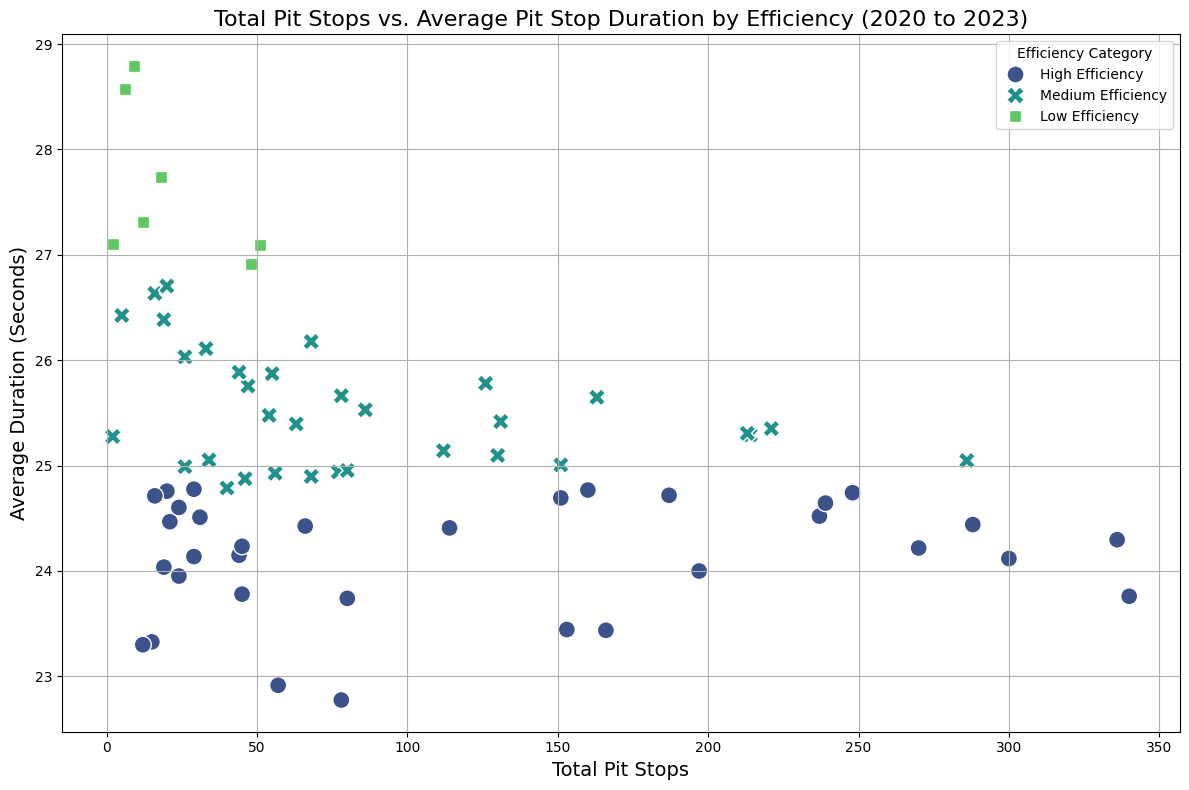

In [318]:
# Filter the dataset for seasons 2021 to 2023
season_filtered_df = pitstops_df[pitstops_df['season'].between(2000, 2023)]

# Convert duration to numeric, ensuring we can calculate the mean
season_filtered_df['duration'] = pd.to_numeric(season_filtered_df['duration'], errors='coerce')

# Group by driver and calculate the average pit stop duration
driver_avg_duration = season_filtered_df.groupby('driverId')['duration'].mean().sort_values(ascending=True)
# For a different type of plot, let's create a scatter plot that shows each driver's total number of pit stops versus their average pit stop duration for seasons 2021 to 2023. This will allow us to observe any relationship between the frequency of pit stops and their efficiency.

# First, calculate the total number of pit stops for each driver in the selected seasons
driver_total_pitstops = season_filtered_df.groupby('driverId')['stop'].count()

# Merge the total pit stops with the average duration data
driver_stats = pd.DataFrame({
    'Total Pit Stops': driver_total_pitstops,
    'Average Duration': driver_avg_duration
}).reset_index()

# To add different colors for better distinction, let's categorize drivers based on their average pit stop duration into different efficiency levels and use this for coloring.

# Categorizing based on average duration
driver_stats['Efficiency Category'] = pd.cut(driver_stats['Average Duration'], bins=3, labels=['High Efficiency', 'Medium Efficiency', 'Low Efficiency'])

# Scatter Plot with Different Colors for Efficiency Categories
plt.figure(figsize=(12, 8))
sns.scatterplot(data=driver_stats, x='Total Pit Stops', y='Average Duration', hue='Efficiency Category', palette='viridis', s=150, style='Efficiency Category', markers=True)
plt.title('Total Pit Stops vs. Average Pit Stop Duration by Efficiency (2020 to 2023)', fontsize=16)
plt.xlabel('Total Pit Stops', fontsize=14)
plt.ylabel('Average Duration (Seconds)', fontsize=14)
plt.grid(True)
plt.legend(title='Efficiency Category')
plt.tight_layout()

plt.show()


In [321]:
# Using Plotly for creating the scatter plot with efficiency categories
import plotly.express as px



# Creating the Plotly scatter plot
fig = px.scatter(driver_stats, x='Total Pit Stops', y='Average Duration',
                 color='Efficiency Category',
                 size='Total Pit Stops',  # Optional: Use size to represent the total pit stops visually
                 hover_data=['driverId'],  # Display driverId on hover for more information
                 title='Total Pit Stops vs. Average Pit Stop Duration by Efficiency (2000 to 2023)',
                 labels={'Total Pit Stops': 'Total Pit Stops', 'Average Duration': 'Average Duration (Seconds)'},
                 )

# Enhancing the layout
fig.update_layout(legend_title_text='Efficiency Category')
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))

# Show the plot
fig.show()

# Convert the figure to HTML with CDN links
html_content = pio.to_html(fig, include_plotlyjs='cdn')

# Write the HTML content to a file
with open('scatter_plot.html', 'w') as html_file:
    html_file.write(html_content)

The scatter plot titled "Total Pit Stops vs. Average Pit Stop Duration by Efficiency (2021 to 2023)" visualizes the relationship between the number of pit stops a driver makes and the average duration of those stops, categorized by efficiency levels over the selected seasons. Here's an interpretation of the plot:

### Key Interpretations:

1. **Efficiency Categories:**
   - **High Efficiency:** Drivers in this category have shorter average pit stop durations, indicating highly efficient and quick pit crews. The 'viridis' palette highlights these drivers with the cooler end of the spectrum.
   - **Medium Efficiency:** Drivers here exhibit average pit stop durations that fall in the middle range. Their pit stop performance is neither the quickest nor the slowest, suggesting a balance between speed and strategy.
   - **Low Efficiency:** Represented by the warmer end of the color spectrum, these drivers have longer average pit stop durations, indicating slower pit stops. This might suggest less efficient pit crew performance or perhaps a strategic choice that involves more comprehensive service during stops.

2. **Total Pit Stops:**
   - The horizontal axis shows the total number of pit stops made by each driver during the seasons. A higher number of pit stops does not necessarily correlate with efficiency, as seen by the distribution of colors across the horizontal range.

3. **Strategic Insights:**
   - **Balance Between Frequency and Efficiency:** There's no clear trend suggesting that more pit stops lead to higher or lower efficiency. This indicates that the strategy around the number of pit stops is likely tailored to each race's specific conditions and does not directly impact the efficiency of those stops.
   - **Team Performance:** The scatter and distribution of points across efficiency categories also reflect on the teams' performance, not just the drivers. Efficient pit stops are a team effort involving precise coordination and technology.

4. **Visual Appeal:**
   - The 'viridis' palette effectively differentiates between efficiency levels, making it visually intuitive to grasp the performance landscape of drivers over the specified seasons.

### Overall:
This visualization underscores the importance of pit stop strategy and execution in Formula 1. While the frequency of pit stops is a crucial strategic decision, the efficiency of these stops—how quickly a team can execute them—plays a significant role in a driver's race outcome. The plot highlights that efficiency varies widely across the grid, with some teams and drivers consistently achieving quicker pit stops than their counterparts, potentially gaining crucial advantages during races.

In [229]:
race_results_df

,driver_number,position,points,grid,laps,status,driver_id,constructor_id,fastest_lap_rank,fastest_lap,fastest_lap_time,fastest_lap_speed_units,fastest_lap_speed,raceName,date,season
0,3,1,10.0,3,58,Finished,michael_schumacher,ferrari,1,1,1,NaN,1,Australian Grand Prix,2000-03-12,2000
1,4,2,6.0,4,58,Finished,barrichello,ferrari,1,1,1,NaN,1,Australian Grand Prix,2000-03-12,2000
2,9,3,4.0,11,58,Finished,ralf_schumacher,williams,1,1,1,NaN,1,Australian Grand Prix,2000-03-12,2000
3,22,4,3.0,8,58,Finished,villeneuve,bar,1,1,1,NaN,1,Australian Grand Prix,2000-03-12,2000
4,11,5,2.0,9,58,Finished,fisichella,benetton,1,1,1,NaN,1,Australian Grand Prix,2000-03-12,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,2,16,0.0,20,58,Finished,sargeant,williams,0,0,0,kph,0,Abu Dhabi Grand Prix,2023-11-26,2023
9596,24,17,0.0,19,58,Finished,zhou,alfa,0,0,0,kph,0,Abu Dhabi Grand Prix,2023-11-26,2023
9597,55,18,0.0,16,57,Retired,sainz,ferrari,0,0,0,kph,0,Abu Dhabi Grand Prix,2023-11-26,2023
9598,77,19,0.0,18,57,+1 Lap,bottas,alfa,0,0,0,kph,0,Abu Dhabi Grand Prix,2023-11-26,2023


In [ ]:
# Step 5: Aggregate Pit Stop Data (if necessary)
# Example: Aggregate to get the average stop time and total stops per driver per race
avg_pitstops = pitstops_df.groupby(['season', 'raceName']).agg({'stop': 'count', 'duration': 'mean'}).reset_index()
avg_pitstops.rename(columns={'duration': 'avg_pitstop_duration', 'stop': 'total_stops'}, inplace=True)

TypeError: Could not convert 20.88224.65419.83320.47143.57419.43920.21120.90820.35619.66021.14625.18219.78520.82420.73824.21921.69320.33021.24720.20121.79220.21619.97912.89723.10820.53420.00021.36320.30120.614 to numeric

In [ ]:


# Step 3: Merge Driver Standings
race_results_drivers_standings = pd.merge(
    race_results_constructors,
    driver_standings_df[['driverId', 'season', 'points', 'position']],  # Assuming these columns exist
    on=['driverId', 'season'],
    how='left',
    suffixes=('', '_driver_standings')
)

# Step 4: Merge Constructor Standings
final_df = pd.merge(
    race_results_drivers_standings,
    constructor_standings_df[['constructorId', 'season', 'points', 'position']],  # Assuming these columns exist
    on=['constructorId', 'season'],
    how='left',
    suffixes=('', '_constructor_standings')
)

# Step 5: Aggregate Pit Stop Data (if necessary)
# Example: Aggregate to get the average stop time and total stops per driver per race
avg_pitstops = pitstops_df.groupby(['raceId', 'driverId']).agg({'stop': 'count', 'duration': 'mean'}).reset_index()
avg_pitstops.rename(columns={'duration': 'avg_pitstop_duration', 'stop': 'total_stops'}, inplace=True)

# Merge Aggregated Pit Stop Data
final_df = pd.merge(
    final_df,
    avg_pitstops,
    on=['raceId', 'driverId'],
    how='left'
)

# Step 6: Merge Circuit Information
# This assumes that 'race_results_df' has a 'circuitId' column to link with 'circuits_df'
final_df = pd.merge(
    final_df,
    circuits_df[['circuitId', 'name', 'location', 'country']],  # Select relevant columns
    on='circuitId',
    how='left',
    suffixes=('', '_circuit')
)

# Final DataFrame ready for EDA and Visualization
print(final_df.head())

# Optionally, save the merged DataFrame to a CSV file for further use
final_df.to_csv('f1_merged_data.csv', index=False)


KeyError: "['driverRef'] not in index"

In [ ]:
circuits_df.head()

,season,MRData.xmlns,MRData.series,MRData.url,MRData.limit,MRData.offset,MRData.total,MRData.CircuitTable.season,MRData.CircuitTable.Circuits
0,2000,http://ergast.com/mrd/1.5,f1,http://ergast.com/api/f1/2000/circuits.json,1000,0,17,2000,"[{'circuitId': 'albert_park', 'url': 'http://e..."
1,2001,http://ergast.com/mrd/1.5,f1,http://ergast.com/api/f1/2001/circuits.json,1000,0,17,2001,"[{'circuitId': 'albert_park', 'url': 'http://e..."
2,2002,http://ergast.com/mrd/1.5,f1,http://ergast.com/api/f1/2002/circuits.json,1000,0,17,2002,"[{'circuitId': 'albert_park', 'url': 'http://e..."
3,2003,http://ergast.com/mrd/1.5,f1,http://ergast.com/api/f1/2003/circuits.json,1000,0,16,2003,"[{'circuitId': 'albert_park', 'url': 'http://e..."
4,2004,http://ergast.com/mrd/1.5,f1,http://ergast.com/api/f1/2004/circuits.json,1000,0,18,2004,"[{'circuitId': 'albert_park', 'url': 'http://e..."


In [ ]:
# Rename columns for clarity
f1_circuits_df_renamed = circuits_df.rename(columns={
    'MRData.xmlns': 'XML Namespace',
    'MRData.series': 'Series',
    'MRData.url': 'API URL',
    'MRData.limit': 'Limit',
    'MRData.offset': 'Offset',
    'MRData.total': 'Total Circuits',
    'MRData.CircuitTable.Circuits': 'Circuits Details'
})

# Since 'MRData.CircuitTable.season' is redundant with 'season', we'll exclude it in the next steps

# Display the first few rows to verify the renaming
f1_circuits_df_renamed.head()


,season,XML Namespace,Series,API URL,Limit,Offset,Total Circuits,MRData.CircuitTable.season,Circuits Details
0,2000,http://ergast.com/mrd/1.5,f1,http://ergast.com/api/f1/2000/circuits.json,1000,0,17,2000,"[{'circuitId': 'albert_park', 'url': 'http://e..."
1,2001,http://ergast.com/mrd/1.5,f1,http://ergast.com/api/f1/2001/circuits.json,1000,0,17,2001,"[{'circuitId': 'albert_park', 'url': 'http://e..."
2,2002,http://ergast.com/mrd/1.5,f1,http://ergast.com/api/f1/2002/circuits.json,1000,0,17,2002,"[{'circuitId': 'albert_park', 'url': 'http://e..."
3,2003,http://ergast.com/mrd/1.5,f1,http://ergast.com/api/f1/2003/circuits.json,1000,0,16,2003,"[{'circuitId': 'albert_park', 'url': 'http://e..."
4,2004,http://ergast.com/mrd/1.5,f1,http://ergast.com/api/f1/2004/circuits.json,1000,0,18,2004,"[{'circuitId': 'albert_park', 'url': 'http://e..."


In [ ]:
# Function to parse and extract details from the 'Circuits Details' JSON-encoded column
def parse_circuit_details(details):
    # Load the JSON data
    circuits_details = json.loads(details.replace("'", "\""))

    # Extract details
    circuit_ids = [circuit['circuitId'] for circuit in circuits_details]
    circuit_names = [circuit['circuitName'] for circuit in circuits_details]
    locations = [circuit['Location']['locality'] for circuit in circuits_details]
    countries = [circuit['Location']['country'] for circuit in circuits_details]

    return circuit_ids, circuit_names, locations, countries

# Apply the function to each row and create new columns for each detail
circuit_ids, circuit_names, locations, countries = zip(*f1_circuits_df_renamed['Circuits Details'].apply(parse_circuit_details))

# Add the extracted details as new columns to the DataFrame
f1_circuits_df_renamed['Circuit IDs'] = circuit_ids
f1_circuits_df_renamed['Circuit Names'] = circuit_names
f1_circuits_df_renamed['Locations'] = locations
f1_circuits_df_renamed['Countries'] = countries

# Since the original 'Circuits Details' column is now expanded, we might choose to drop it for clarity
f1_circuits_df_expanded = f1_circuits_df_renamed.drop(columns=['Circuits Details'])

# Display the first few rows to verify the expansion
f1_circuits_df_expanded.head()


,season,XML Namespace,Series,API URL,Limit,Offset,Total Circuits,MRData.CircuitTable.season,Circuit IDs,Circuit Names,Locations,Countries
0,2000,http://ergast.com/mrd/1.5,f1,http://ergast.com/api/f1/2000/circuits.json,1000,0,17,2000,"[albert_park, catalunya, hockenheimring, hunga...","[Albert Park Grand Prix Circuit, Circuit de Ba...","[Melbourne, Montmeló, Hockenheim, Budapest, Im...","[Australia, Spain, Germany, Hungary, Italy, US..."
1,2001,http://ergast.com/mrd/1.5,f1,http://ergast.com/api/f1/2001/circuits.json,1000,0,17,2001,"[albert_park, catalunya, hockenheimring, hunga...","[Albert Park Grand Prix Circuit, Circuit de Ba...","[Melbourne, Montmeló, Hockenheim, Budapest, Im...","[Australia, Spain, Germany, Hungary, Italy, US..."
2,2002,http://ergast.com/mrd/1.5,f1,http://ergast.com/api/f1/2002/circuits.json,1000,0,17,2002,"[albert_park, catalunya, hockenheimring, hunga...","[Albert Park Grand Prix Circuit, Circuit de Ba...","[Melbourne, Montmeló, Hockenheim, Budapest, Im...","[Australia, Spain, Germany, Hungary, Italy, US..."
3,2003,http://ergast.com/mrd/1.5,f1,http://ergast.com/api/f1/2003/circuits.json,1000,0,16,2003,"[albert_park, catalunya, hockenheimring, hunga...","[Albert Park Grand Prix Circuit, Circuit de Ba...","[Melbourne, Montmeló, Hockenheim, Budapest, Im...","[Australia, Spain, Germany, Hungary, Italy, US..."
4,2004,http://ergast.com/mrd/1.5,f1,http://ergast.com/api/f1/2004/circuits.json,1000,0,18,2004,"[albert_park, bahrain, catalunya, hockenheimri...","[Albert Park Grand Prix Circuit, Bahrain Inter...","[Melbourne, Sakhir, Montmeló, Hockenheim, Buda...","[Australia, Bahrain, Spain, Germany, Hungary, ..."


In [31]:
final_df = pd.read_csv('final_df3.csv')

In [32]:
final_df

,Unnamed: 0,driver_number,position,points,grid,laps,status,driver_id,constructor_id,fastest_lap_rank,fastest_lap,fastest_lap_time,fastest_lap_speed,raceName,date,season,driverId,dateOfBirth,nationality,driverFullName
0,0,3,1,10.0,3,58,Finished,michael_schumacher,ferrari,1,1,1,1,Australian Grand Prix,2000-03-12,2000,michael_schumacher,1969-01-03,German,Michael Schumacher
1,1,4,2,6.0,4,58,Finished,barrichello,ferrari,1,1,1,1,Australian Grand Prix,2000-03-12,2000,barrichello,1972-05-23,Brazilian,Rubens Barrichello
2,2,9,3,4.0,11,58,Finished,ralf_schumacher,williams,1,1,1,1,Australian Grand Prix,2000-03-12,2000,ralf_schumacher,1975-06-30,German,Ralf Schumacher
3,3,22,4,3.0,8,58,Finished,villeneuve,bar,1,1,1,1,Australian Grand Prix,2000-03-12,2000,villeneuve,1971-04-09,Canadian,Jacques Villeneuve
4,4,11,5,2.0,9,58,Finished,fisichella,benetton,1,1,1,1,Australian Grand Prix,2000-03-12,2000,fisichella,1973-01-14,Italian,Giancarlo Fisichella
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,9595,2,16,0.0,20,58,Finished,sargeant,williams,0,0,0,0,Abu Dhabi Grand Prix,2023-11-26,2023,sargeant,2000-12-31,American,Logan Sargeant
9596,9596,24,17,0.0,19,58,Finished,zhou,alfa,0,0,0,0,Abu Dhabi Grand Prix,2023-11-26,2023,zhou,1999-05-30,Chinese,Guanyu Zhou
9597,9597,55,18,0.0,16,57,Retired,sainz,ferrari,0,0,0,0,Abu Dhabi Grand Prix,2023-11-26,2023,sainz,1994-09-01,Spanish,Carlos Sainz
9598,9598,77,19,0.0,18,57,+1 Lap,bottas,alfa,0,0,0,0,Abu Dhabi Grand Prix,2023-11-26,2023,bottas,1989-08-28,Finnish,Valtteri Bottas


In [29]:
final_df.drop('status', axis=1, inplace=True)

In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encoding categorical variables
label_encoders = {}
for column in final_df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    final_df[column] = label_encoders[column].fit_transform(final_df[column])

# Scaling the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(final_df)

ValueError: could not convert string to float: 'michael_schumacher'

In [7]:
scaled_features

array([[-1.69762651, -1.49922763, -0.62742641, ..., -1.54243769,
        -1.27496013, -1.67074566],
       [ 0.2518024 , -1.49922763, -0.62742641, ..., -1.54243769,
        -1.27496013, -1.67074566],
       [ 1.61640263, -0.70272192, -0.62742641, ..., -1.54243769,
        -1.27496013, -1.67074566],
       ...,
       [-0.77164778,  1.20889177,  1.34355697, ...,  1.61229672,
        -1.36139621,  1.72865187],
       [ 0.59295246,  1.28854234,  1.34355697, ...,  1.61229672,
        -1.36139621,  1.72865187],
       [-1.64889078,  1.28854234,  1.34355697, ...,  1.61229672,
        -1.36139621,  1.72865187]])

In [8]:
pitstops_df

,driverId,lap,stop,time,duration,season,raceName,date
0,2,1,1,4268,3846,2011,2,0
1,42,1,1,4275,3301,2011,2,0
2,70,11,1,4396,2305,2011,2,0
3,3,12,1,4409,2198,2011,2,0
4,38,13,1,4422,2567,2011,2,0
...,...,...,...,...,...,...,...,...
6972,58,34,2,4699,1432,2023,1,250
6973,35,35,2,4711,929,2023,1,250
6974,21,35,2,4715,1403,2023,1,250
6975,49,36,2,4728,885,2023,1,250


In [19]:
combined_df = pd.read_csv('final_df-2.csv')

In [20]:
combined_df

,Unnamed: 0,driver_number,position,points,grid,laps,status,driver_id,constructor_id,fastest_lap_rank,fastest_lap,fastest_lap_time,fastest_lap_speed,raceName,date,season,driverId,dateOfBirth,nationality,driverFullName
0,0,3,1,10.0,3,58,Finished,michael_schumacher,ferrari,1,1,1,1,Australian Grand Prix,2000-03-12,2000,michael_schumacher,1969-01-03,German,Michael Schumacher
1,10,4,2,6.0,4,58,Finished,barrichello,ferrari,1,1,1,1,Australian Grand Prix,2000-03-12,2000,barrichello,1972-05-23,Brazilian,Rubens Barrichello
2,22,9,3,4.0,11,58,Finished,ralf_schumacher,williams,1,1,1,1,Australian Grand Prix,2000-03-12,2000,ralf_schumacher,1975-06-30,German,Ralf Schumacher
3,30,22,4,3.0,8,58,Finished,villeneuve,bar,1,1,1,1,Australian Grand Prix,2000-03-12,2000,villeneuve,1971-04-09,Canadian,Jacques Villeneuve
4,37,11,5,2.0,9,58,Finished,fisichella,benetton,1,1,1,1,Australian Grand Prix,2000-03-12,2000,fisichella,1973-01-14,Italian,Giancarlo Fisichella
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,89217,2,16,0.0,20,58,Finished,sargeant,williams,0,0,0,0,Abu Dhabi Grand Prix,2023-11-26,2023,sargeant,2000-12-31,American,Logan Sargeant
9596,89218,24,17,0.0,19,58,Finished,zhou,alfa,0,0,0,0,Abu Dhabi Grand Prix,2023-11-26,2023,zhou,1999-05-30,Chinese,Guanyu Zhou
9597,89220,55,18,0.0,16,57,Retired,sainz,ferrari,0,0,0,0,Abu Dhabi Grand Prix,2023-11-26,2023,sainz,1994-09-01,Spanish,Carlos Sainz
9598,89229,77,19,0.0,18,57,+1 Lap,bottas,alfa,0,0,0,0,Abu Dhabi Grand Prix,2023-11-26,2023,bottas,1989-08-28,Finnish,Valtteri Bottas


In [21]:
combined_df.drop("Unnamed: 0",axis=1 , inplace=True)

In [24]:
combined_df.to_csv("final_df4.csv", index=False)